<a href="https://colab.research.google.com/github/datasocode/Tests-Statistiques/blob/main/Analyse_des_KPI_des_Ventes_et_Comportement_des_Clients_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import plotly.express as px

import warnings
warnings.filterwarnings(action='ignore')

#import warnings
#warnings.filterwarnings(action='default')

#  1 . L'exploration et la visualisation de données

# 1.1 Customers

### 8623 individus : l'identifiant, le sexe et l'année de naissance.

In [5]:
customers = pd.read_csv('customers.csv', sep = ',')
customers.head()

client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943

In [6]:
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [7]:
# vérifier l'unicité de la clé

customers['client_id'].duplicated().sum()

0

In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [9]:
# répartiton par genre

customers['sex'].value_counts(normalize = True).round(4)

f    0.5208
m    0.4792
Name: sex, dtype: float64

In [10]:
# répartiton par genre customers['sex'].value_counts()

customers['sex'].value_counts()

f    4491
m    4132
Name: sex, dtype: int64

In [11]:
plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 10

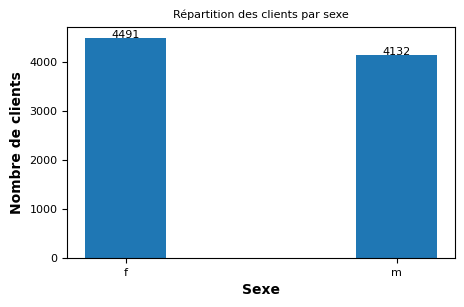

In [12]:
plt.figure(figsize=(5, 3))

sex_counts = customers['sex'].value_counts()

plt.bar(sex_counts.index, sex_counts.values, width=0.3)
plt.xlabel('Sexe')
plt.ylabel('Nombre de clients')
plt.title('Répartition des clients par sexe',fontsize=8)

for i in range(len(sex_counts)):
    plt.text(x = i, y = sex_counts.values[i], s = sex_counts.values[i], ha='center', fontsize=8);

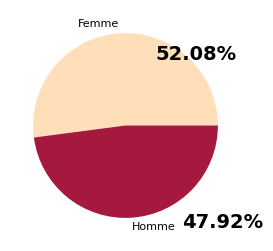

In [13]:
size_of_groups = [52.08, 47.92]
colors = ['#FFDFB9', '#A4193D']
names = ['Femme', 'Homme']

fig, ax = plt.subplots(figsize=(3,3))

ax.pie(size_of_groups, labels=names, colors=colors)

for i, v in enumerate(size_of_groups):
    ax.text(1.3*np.sin(np.pi*(i/len(size_of_groups) + 0.2)),
            1.3*np.cos(np.pi*(i/len(size_of_groups) + 0.3)), f"{v:.2f}%",
            fontweight='bold', fontsize=14, ha='center', va='center');

In [209]:
femme = customers.loc[customers['sex']== 'f']
femme.head()

client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
6     c_285   f   1967

In [15]:
women = femme.pivot_table('sex', index = ['birth'],
                 columns = 'sex', aggfunc = 'count')
women.head()

sex    f
birth   
1929   1
1930   3
1931   2
1932   5
1933   5

In [16]:
homme = customers.loc[customers['sex']== 'm']
homme.head()

client_id sex  birth
4     c_5320   m   1943
5      c_415   m   1993
8     c_6446   m   1971
9     c_6866   m   1993
10    c_1013   m   1982

In [17]:
men = homme.pivot_table('sex', index = ['birth'],
                 columns = 'sex', aggfunc = 'count')
men.head()

sex    m
birth   
1929   2
1930   1
1931   2
1932   1
1933   3

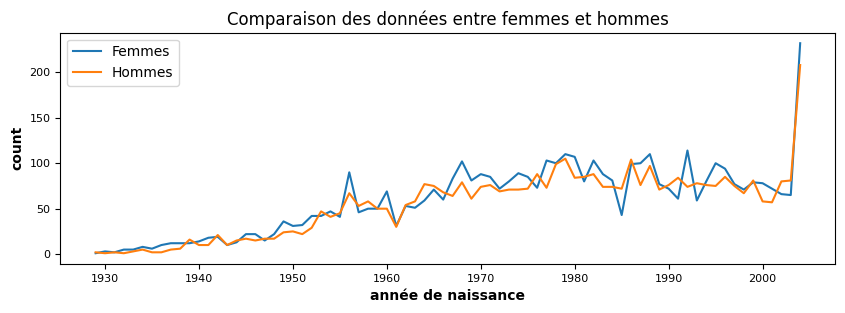

In [18]:
plt.figure(figsize=(10, 3))

plt.plot(women,label='Femmes')
plt.plot(men,label='Hommes')
plt.xlabel('année de naissance')
plt.ylabel('count')
plt.title('Comparaison des données entre femmes et hommes')
plt.legend();

In [19]:
customers.shape

(8623, 3)

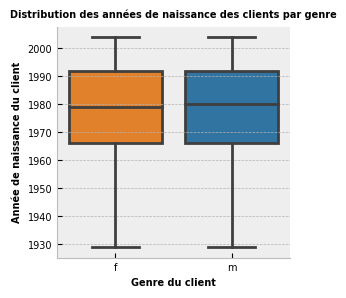

In [20]:
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (3,3)
ax = sns.boxplot(x=customers['sex'], y=customers['birth'], palette=['#FF7F0E','#1F77B4'])
plt.xlabel("Genre du client", fontsize=7, fontweight='bold')
plt.ylabel("Année de naissance du client", fontsize=7, fontweight='bold')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title("Distribution des années de naissance des clients par genre", fontsize=7, fontweight='bold')
sns.despine();

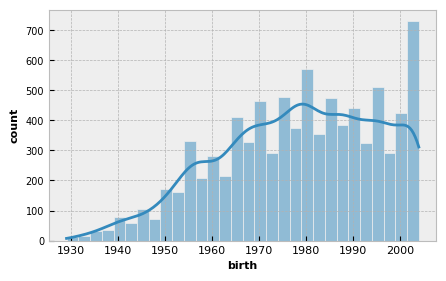

In [21]:
plt.figure(figsize=(5, 3))

sns.histplot(data=customers, x='birth', kde=True)
plt.ylabel("count",fontsize=8)
plt.xlabel('birth',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=7);

In [22]:
stats.normaltest(customers['birth'])

NormaltestResult(statistic=511.145768233699, pvalue=1.0141605292306432e-111)

L'ensemble de données de 8623 clients est un ensemble de données contenant des informations sur des clients.
* La clé primaire est l'ID du client, qui est unique pour chaque client.
* Il n'y a aucun doublon dans cet ensemble de données et aucune valeur manquante.
* Les clients dans cet ensemble de données sont âgés de 18 à 93 ans et se répartissent également entre hommes et femmes.
* La répartition des catégories d'achat entre les hommes et les femmes est quasi équivalente.
* Il y a un pic dans le nombre de personnes nées en 2004.


# 1.2 Products

### 3287 livres : l'identifiant, le prix et la catégorie

In [23]:
products = pd.read_csv('products.csv',sep = ',')
products.head()

id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0

In [24]:
products.shape

(3287, 3)

In [25]:
products['categ'] = products['categ'].astype(int)
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [26]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [27]:
products['price'].value_counts(normalize=True).sort_values(ascending = False)

4.99     0.025859
6.99     0.025555
3.99     0.024338
5.99     0.023730
8.99     0.022513
           ...   
21.16    0.000304
12.62    0.000304
12.95    0.000304
54.87    0.000304
25.16    0.000304
Name: price, Length: 1455, dtype: float64

In [28]:
# vérifier les valeurs manquantes et les doublons : products

products.duplicated().sum()

0

In [29]:
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [30]:
products['categ'].nunique()

3

In [31]:
# l'unicité de la clé respectée

products['id_prod'].duplicated().sum()

0

In [32]:
# constater la valeur -1.0 la colonne 'price'

products.sort_values(by = "price", ascending = True).head()

id_prod  price  categ
731      T_0  -1.00      0
2355   0_202   0.62      0
2272   0_528   0.62      0
370    0_120   0.66      0
1211  0_1844   0.77      0

In [33]:
products.groupby('categ').sum()

price
categ          
0      27078.29
1      18867.72
2      25896.77

### eliminer -1.00 €

In [34]:
products_df = products[products['price'] != -1.0]
products_df.describe()

price        categ
count  3286.000000  3286.000000
mean     21.863597     0.370359
std      29.849786     0.615446
min       0.620000     0.000000
25%       6.990000     0.000000
50%      13.075000     0.000000
75%      22.990000     1.000000
max     300.000000     2.000000

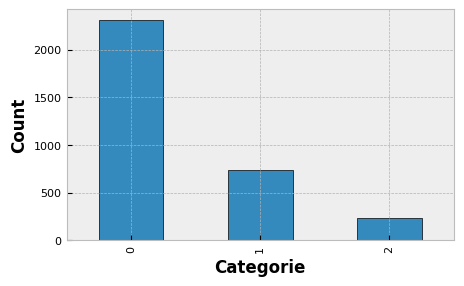

In [35]:
fig = plt.figure(figsize=(5, 3))

products_df['categ'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Categorie')
plt.ylabel('Count');

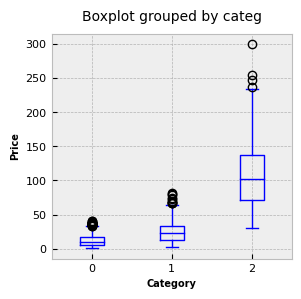

In [36]:
ax = products_df.boxplot(column='price',by='categ', color='blue', figsize=(3, 3))
ax.set_xlabel('Category', fontsize=7)
ax.set_ylabel('Price', fontsize=7)
ax.set_title('')
plt.show()

In [37]:
categ = products_df.groupby('categ')
categ['price'].describe()

count        mean        std    min      25%     50%      75%     max
categ                                                                        
0      2308.0   11.732795   7.565755   0.62   5.5875   10.32   16.655   40.99
1       739.0   25.531421  15.425162   2.00  13.3900   22.99   33.990   80.99
2       239.0  108.354686  49.561431  30.99  71.0650  101.99  136.530  300.00

In [38]:
categ.median()

price
categ        
0       10.32
1       22.99
2      101.99

In [39]:
products_df['categ'].value_counts(normalize=True).sort_values(ascending = False).round(3)

0    0.702
1    0.225
2    0.073
Name: categ, dtype: float64

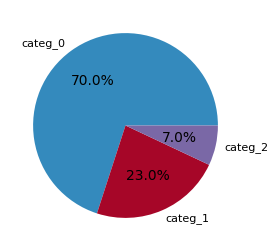

In [40]:
plt.figure(figsize=(3, 3))
colors = ['#66B2FF', '#0072B2', '#003C71']
categorie = ['categ_0', 'categ_1', 'categ_2']
values = [70, 23, 7]
plt.pie(values, labels=categorie, autopct='%.1f%%');

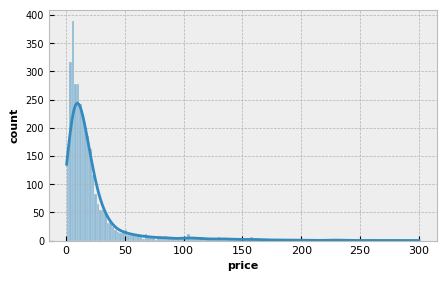

In [41]:
# distribution des prix

# HO : la distribution des données de cette série est normale.
# Ha : la distribution des données de cette série ne suivra pas une distribution normale.

plt.figure(figsize=(5, 3))

sns.histplot(data=products_df, x='price', kde=True)
plt.ylabel( "count",fontsize=8)
plt.xlabel('price',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=7);

In [42]:
from scipy.stats import normaltest

stats.normaltest(products_df['price'])

NormaltestResult(statistic=2627.9652000972355, pvalue=0.0)

L'ensemble de données de 3287 livres contient des informations sur des livres, avec l'ID du produit comme clé primaire, ce qui signifie qu'il n'y a aucun doublon dans cet ensemble de données.
* Aucune valeur manquante n'est présente dans cet ensemble de données.
* Les livres de cet ensemble de données appartiennent à trois catégories différentes, dont la catégorie 0 représente 70 % des éléments.
* La fourchette de prix des livres est comprise entre -1,00 € et 300 €, ce qui suggère une large gamme de prix.

# 1.3 Transactions

### la date et les identifiants de la session, du client et du produit vendu

In [43]:
transactions = pd.read_csv('transactions.csv',sep = ',')
transactions.head()

id_prod                        date session_id client_id
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232

In [44]:
transactions.shape

(83753, 4)

In [45]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83753 entries, 0 to 83752
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_prod     83753 non-null  object
 1   date        83753 non-null  object
 2   session_id  83753 non-null  object
 3   client_id   83752 non-null  object
dtypes: object(4)
memory usage: 2.6+ MB


In [46]:
# vérifier les valeurs manquantes et les doublons : transactions

transactions.duplicated().sum()

2

In [47]:
transactions.loc[transactions.duplicated()]

id_prod                             date session_id client_id
27778     T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
52424     T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0

In [48]:
transactions.sort_values(by = 'date')

id_prod                             date session_id client_id
47297  0_1571       2021-03-01 00:30:49.807861       s_12    c_2505
46561   1_453       2021-03-01 00:32:08.482839       s_17    c_7222
7642    1_376       2021-03-01 00:47:02.319747       s_22    c_4348
67209   1_564       2021-03-01 01:32:47.336658       s_38    c_1478
22884  0_1521       2021-03-01 01:33:58.429643       s_26    c_1492
...       ...                              ...        ...       ...
53701     T_0  test_2021-03-01 02:30:02.237440        s_0      ct_1
50853     T_0  test_2021-03-01 02:30:02.237441        s_0      ct_1
23696     T_0  test_2021-03-01 02:30:02.237444        s_0      ct_0
38646     T_0  test_2021-03-01 02:30:02.237445        s_0      ct_1
19312     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_0

[83753 rows x 4 columns]

In [49]:
# vérifier les doublons

transactions[transactions.duplicated()]

id_prod                             date session_id client_id
27778     T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
52424     T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0

In [50]:
transactions.loc[transactions['id_prod'] == "T_0"]

id_prod                             date session_id client_id
3019      T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138      T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668      T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728     T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292     T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
19312     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_0
23678     T_0  test_2021-03-01 02:30:02.237430        s_0      ct_1
23696     T_0  test_2021-03-01 02:30:02.237444        s_0      ct_0
27778     T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
35433     T_0  test_2021-03-01 02:30:02.237418        s_0      ct_1
38646     T_0  test_2021-03-01 02:30:02.237445        s_0      ct_1
46966     T_0  test_2021-03-01 02:30:02.237426        s_0      ct_0
49254     T_0  test_2021-03-01 02:30:02.237434        s_0      ct_1
50853     T_0  test_2021-03-01 02:30:02.237441        s_0      ct_1
52424     T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
53701     T_0  test_2021-03-01 02:30:02.237440        s_0      ct_1
69450     T_0  test_2021-03-01 02:30:02.237438        s_0      ct_1
72006     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_0
82253     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1

In [51]:
from datetime import datetime

### id_prod T_0 : 200 lignes

In [52]:
transactions.loc[transactions['id_prod'] == 'T_0']

id_prod                             date session_id client_id
3019      T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138      T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668      T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728     T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292     T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
19312     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_0
23678     T_0  test_2021-03-01 02:30:02.237430        s_0      ct_1
23696     T_0  test_2021-03-01 02:30:02.237444        s_0      ct_0
27778     T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
35433     T_0  test_2021-03-01 02:30:02.237418        s_0      ct_1
38646     T_0  test_2021-03-01 02:30:02.237445        s_0      ct_1
46966     T_0  test_2021-03-01 02:30:02.237426        s_0      ct_0
49254     T_0  test_2021-03-01 02:30:02.237434        s_0      ct_1
50853     T_0  test_2021-03-01 02:30:02.237441        s_0      ct_1
52424     T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
53701     T_0  test_2021-03-01 02:30:02.237440        s_0      ct_1
69450     T_0  test_2021-03-01 02:30:02.237438        s_0      ct_1
72006     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_0
82253     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1

In [53]:
test = transactions[transactions['date'].str.contains('test')]
test

id_prod                             date session_id client_id
3019      T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138      T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668      T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728     T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292     T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
19312     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_0
23678     T_0  test_2021-03-01 02:30:02.237430        s_0      ct_1
23696     T_0  test_2021-03-01 02:30:02.237444        s_0      ct_0
27778     T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
35433     T_0  test_2021-03-01 02:30:02.237418        s_0      ct_1
38646     T_0  test_2021-03-01 02:30:02.237445        s_0      ct_1
46966     T_0  test_2021-03-01 02:30:02.237426        s_0      ct_0
49254     T_0  test_2021-03-01 02:30:02.237434        s_0      ct_1
50853     T_0  test_2021-03-01 02:30:02.237441        s_0      ct_1
52424     T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
53701     T_0  test_2021-03-01 02:30:02.237440        s_0      ct_1
69450     T_0  test_2021-03-01 02:30:02.237438        s_0      ct_1
72006     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_0
82253     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1

### Suppression les lignes test_date

In [54]:
# selectionner que les clients ct_0,ct_1

mask = ~((transactions['id_prod'] == 'T_0'))

# eliminer  les clients T_0

transactions_df = transactions.loc[mask]

In [55]:
# convertir la colonne date en datetime
transactions_df['date'] = pd.to_datetime(transactions_df['date'],format='%Y-%m-%d')

timestamp = transactions_df['date']
timestamp

0       2022-05-20 13:21:29.043970
1       2022-02-02 07:55:19.149409
2       2022-06-18 15:44:33.155329
3       2021-06-24 04:19:29.835891
4       2023-01-11 08:22:08.194479
                   ...            
83748   2023-01-30 23:52:03.847565
83749   2022-04-12 12:38:54.183329
83750   2021-05-16 15:08:00.550980
83751   2023-02-22 00:43:00.543335
83752   2022-10-25 12:47:03.539697
Name: date, Length: 83734, dtype: datetime64[ns]

In [56]:
transactions_df['time'] = pd.to_datetime(timestamp)

In [57]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83734 entries, 0 to 83752
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     83734 non-null  object        
 1   date        83734 non-null  datetime64[ns]
 2   session_id  83734 non-null  object        
 3   client_id   83733 non-null  object        
 4   time        83734 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 3.8+ MB


In [58]:
# Conversion de la colonne 'date' en objet datetime et extraction de la date
transactions_df['time'] = pd.to_datetime(transactions_df['date']).dt.date
transactions_df

id_prod                       date session_id client_id        time
0      0_1518 2022-05-20 13:21:29.043970   s_211425     c_103  2022-05-20
1       1_251 2022-02-02 07:55:19.149409   s_158752    c_8534  2022-02-02
2      0_1277 2022-06-18 15:44:33.155329   s_225667    c_6714  2022-06-18
3       2_209 2021-06-24 04:19:29.835891    s_52962    c_6941  2021-06-24
4      0_1509 2023-01-11 08:22:08.194479   s_325227    c_4232  2023-01-11
...       ...                        ...        ...       ...         ...
83748   2_203 2023-01-30 23:52:03.847565   s_334728    c_1821  2023-01-30
83749   2_143 2022-04-12 12:38:54.183329   s_192963    c_8576  2022-04-12
83750  0_1023 2021-05-16 15:08:00.550980    s_35321    c_6847  2021-05-16
83751    1_35 2023-02-22 00:43:00.543335   s_345091    c_1265  2023-02-22
83752  0_1594 2022-10-25 12:47:03.539697          s       NaN  2022-10-25

[83734 rows x 5 columns]

In [59]:
transactions_df.duplicated().sum()

0

In [60]:
# la période de transaction : 2021/03/01 - 2023/02/28 sur 24 mois


transactions_df.sort_values(by ='date').head()

id_prod                       date session_id client_id        time
47297  0_1571 2021-03-01 00:30:49.807861       s_12    c_2505  2021-03-01
46561   1_453 2021-03-01 00:32:08.482839       s_17    c_7222  2021-03-01
7642    1_376 2021-03-01 00:47:02.319747       s_22    c_4348  2021-03-01
67209   1_564 2021-03-01 01:32:47.336658       s_38    c_1478  2021-03-01
22884  0_1521 2021-03-01 01:33:58.429643       s_26    c_1492  2021-03-01

In [61]:
transactions_df.sort_values(by ='date').tail()

id_prod                       date session_id client_id        time
13163    2_13 2023-02-28 23:08:40.035146   s_348403    c_4958  2023-02-28
72616   1_712 2023-02-28 23:15:56.101651   s_348400     c_159  2023-02-28
28754  0_1461 2023-02-28 23:17:58.513660   s_348400     c_159  2023-02-28
48651  0_1568 2023-02-28 23:22:54.881433   s_348433    c_6562  2023-02-28
1705   0_1144 2023-02-28 23:33:12.421363   s_348436    c_7652  2023-02-28

In [62]:
transactions_df.duplicated().sum()

0

In [63]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83734 entries, 0 to 83752
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     83734 non-null  object        
 1   date        83734 non-null  datetime64[ns]
 2   session_id  83734 non-null  object        
 3   client_id   83733 non-null  object        
 4   time        83734 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 3.8+ MB


In [64]:
transactions_date = transactions_df.groupby(transactions_df['time']).count()
transactions_date

id_prod  date  session_id  client_id
time                                            
2021-03-01       99    99          99         99
2021-03-02      114   114         114        114
2021-03-03      130   130         130        130
2021-03-04      114   114         114        114
2021-03-05      112   112         112        112
...             ...   ...         ...        ...
2023-02-24      106   106         106        106
2023-02-25      118   118         118        118
2023-02-26      106   106         106        106
2023-02-27      138   138         138        138
2023-02-28      107   107         107        107

[730 rows x 4 columns]

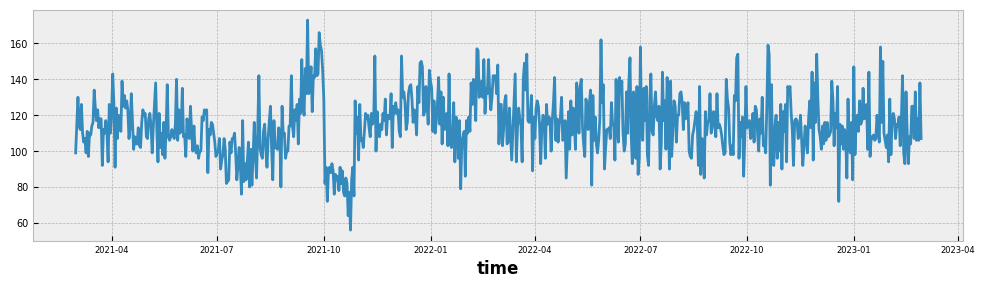

In [65]:
plt.xticks(fontsize=6)
plt.yticks(fontsize=7)
transactions_date['client_id'].plot(figsize= (12,3));

In [66]:
transactions_df.duplicated().sum()

0

### Les clients B2B

In [67]:
transactions['client_id'].value_counts()

c_1609    3116
c_6714    1192
c_3454     888
c_4958     607
c_2505      59
          ... 
c_3136       1
c_181        1
c_5034       1
c_8239       1
c_1821       1
Name: client_id, Length: 8187, dtype: int64

In [68]:
mask = (transactions_df['client_id'] == 'c_1609') | (transactions_df['client_id'] == 'c_6714') | (transactions_df['client_id'] == 'c_3454') | (transactions_df['client_id'] == 'c_4958')
mask

0        False
1        False
2         True
3        False
4        False
         ...  
83748    False
83749    False
83750    False
83751    False
83752    False
Name: client_id, Length: 83734, dtype: bool

In [69]:
transactions_df.loc[(transactions_df['client_id'] == 'c_1609') | (transactions_df['client_id'] == 'c_6714') | (transactions_df['client_id'] == 'c_3454') | (transactions_df['client_id'] == 'c_4958')]

id_prod                       date session_id client_id        time
2      0_1277 2022-06-18 15:44:33.155329   s_225667    c_6714  2022-06-18
17      1_661 2022-09-13 10:18:02.746197   s_267366    c_6714  2022-09-13
32      1_426 2021-06-21 17:47:57.023863    s_51846    c_4958  2021-06-21
63      1_506 2021-09-29 03:52:29.731798    s_97203    c_4958  2021-09-29
67     0_1446 2022-10-05 07:43:00.225116   s_278030    c_1609  2022-10-05
...       ...                        ...        ...       ...         ...
83605  0_2083 2022-12-17 09:21:44.390288   s_313360    c_1609  2022-12-17
83637  0_1449 2023-02-15 20:45:20.980063   s_342121    c_1609  2023-02-15
83686  0_1347 2023-02-22 21:59:43.814117   s_345486    c_1609  2023-02-22
83690  0_1156 2022-02-03 17:32:28.526314   s_159453    c_1609  2022-02-03
83708  0_1338 2021-08-11 21:30:14.267734    s_74480    c_1609  2021-08-11

[5803 rows x 5 columns]

### Suppression des clients B2B

In [70]:
transactions_df = transactions_df[~mask]
transactions_df

id_prod                       date session_id client_id        time
0      0_1518 2022-05-20 13:21:29.043970   s_211425     c_103  2022-05-20
1       1_251 2022-02-02 07:55:19.149409   s_158752    c_8534  2022-02-02
3       2_209 2021-06-24 04:19:29.835891    s_52962    c_6941  2021-06-24
4      0_1509 2023-01-11 08:22:08.194479   s_325227    c_4232  2023-01-11
5      0_1418 2022-10-20 15:59:16.084030   s_285425    c_1478  2022-10-20
...       ...                        ...        ...       ...         ...
83748   2_203 2023-01-30 23:52:03.847565   s_334728    c_1821  2023-01-30
83749   2_143 2022-04-12 12:38:54.183329   s_192963    c_8576  2022-04-12
83750  0_1023 2021-05-16 15:08:00.550980    s_35321    c_6847  2021-05-16
83751    1_35 2023-02-22 00:43:00.543335   s_345091    c_1265  2023-02-22
83752  0_1594 2022-10-25 12:47:03.539697          s       NaN  2022-10-25

[77931 rows x 5 columns]

In [71]:
transactions_df['time'] = pd.to_datetime(transactions_df['time'])

In [72]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77931 entries, 0 to 83752
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     77931 non-null  object        
 1   date        77931 non-null  datetime64[ns]
 2   session_id  77931 non-null  object        
 3   client_id   77930 non-null  object        
 4   time        77931 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 3.6+ MB


Cet ensemble de données contient des informations sur 679532 transactions effectuées sur une période de 24 mois, du 1er mars 2021 au 28 février 2023.
* La clé primaire pour chaque transaction est composée de l'ID client et de la date de la transaction.
* La clé étrangère relie chaque transaction à un produit spécifique grâce à l'ID client et l'ID du produit.
* Il y a 126 doublons dans cet ensemble de données, mais il n'y a aucune valeur manquante.
* Les dates commençant par "test" se trouvent dans les identifiants de produit T_O.
* Les clients B2B font partie de cet ensemble de données, ce qui suggère que les transactions peuvent être à la fois de nature B2C et B2B.
* La période de transaction montre une chute au mois d'octobre.
* Les dates ont été converties au format datetime pour une analyse plus facile des tendances temporelles.

# 2. Jointure

In [73]:
#.merge : la table 'customers' et la table transactions

customers_transactions = pd.merge(customers,transactions_df, on = 'client_id', how = 'outer')
customers_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78373 entries, 0 to 78372
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   client_id   78372 non-null  object        
 1   sex         78372 non-null  object        
 2   birth       78372 non-null  float64       
 3   id_prod     77931 non-null  object        
 4   date        77931 non-null  datetime64[ns]
 5   session_id  77931 non-null  object        
 6   time        77931 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 4.8+ MB


In [74]:
customers_transactions.isnull().sum()

client_id       1
sex             1
birth           1
id_prod       442
date          442
session_id    442
time          442
dtype: int64

In [75]:
# .merge : la table 'customers_transaction' et la table 'products'

ctp = pd.merge(customers_transactions,products_df, on = 'id_prod',how = 'outer' )
ctp.head()

client_id sex   birth id_prod                       date session_id  \
0    c_4410   f  1967.0  0_1316 2021-12-29 09:11:18.860592   s_141762   
1    c_4410   f  1967.0  0_1316 2022-03-29 09:11:18.860592   s_186233   
2    c_4430   m  1986.0  0_1316 2021-05-03 16:41:38.212848    s_29404   
3     c_267   f  1973.0  0_1316 2022-01-15 23:48:09.260347   s_150401   
4    c_8158   m  1984.0  0_1316 2021-07-10 14:11:24.280739    s_60466   

        time  price  categ  
0 2021-12-29    7.2    0.0  
1 2022-03-29    7.2    0.0  
2 2021-05-03    7.2    0.0  
3 2022-01-15    7.2    0.0  
4 2021-07-10    7.2    0.0

In [76]:
ctp.duplicated().sum()

0

### Suppression les valeurs nulll

In [77]:
ctp.isnull().sum()

client_id     374
sex           374
birth         374
id_prod       442
date          815
session_id    815
time          815
price         465
categ         465
dtype: int64

In [78]:
ctp_df = ctp.dropna()
ctp_df.shape

(77907, 9)

In [79]:
categ_price = pd.pivot_table(ctp_df,index = 'categ',values = 'price',aggfunc = 'sum')
categ_price

price
categ           
0.0    505649.83
1.0    535155.89
2.0    308361.46

In [80]:
ctp_df.describe()

birth         price         categ
count  77907.000000  77907.000000  77907.000000
mean    1977.663304     17.317663      0.440153
std       13.896177     18.124764      0.591766
min     1929.000000      0.620000      0.000000
25%     1971.000000      8.650000      0.000000
50%     1979.000000     13.960000      0.000000
75%     1987.000000     18.990000      1.000000
max     2004.000000    300.000000      2.000000

In [81]:
ctp_df.duplicated().sum()

0

### Calcul de l'âge

In [82]:
# calculer l'âge

ctp_df['age'] = 2023 - ctp_df['birth']
ctp_df.head()

client_id sex   birth id_prod                       date session_id  \
0    c_4410   f  1967.0  0_1316 2021-12-29 09:11:18.860592   s_141762   
1    c_4410   f  1967.0  0_1316 2022-03-29 09:11:18.860592   s_186233   
2    c_4430   m  1986.0  0_1316 2021-05-03 16:41:38.212848    s_29404   
3     c_267   f  1973.0  0_1316 2022-01-15 23:48:09.260347   s_150401   
4    c_8158   m  1984.0  0_1316 2021-07-10 14:11:24.280739    s_60466   

        time  price  categ   age  
0 2021-12-29    7.2    0.0  56.0  
1 2022-03-29    7.2    0.0  56.0  
2 2021-05-03    7.2    0.0  37.0  
3 2022-01-15    7.2    0.0  50.0  
4 2021-07-10    7.2    0.0  39.0

In [83]:
birth_counts = ctp_df['birth'].value_counts().to_frame()
birth_counts.reindex
birth_counts.sort_values(by ='birth', ascending = False).head()

birth
1988.0   3154
1978.0   3056
1979.0   3009
1986.0   2877
1980.0   2661

In [84]:
# pivot table

p_table = pd.pivot_table(ctp_df, index=['birth'], aggfunc= {'price': 'sum'})
p_table.sort_values(by = 'price', ascending = True).head()

price
birth         
1931.0  419.26
1929.0  454.62
1930.0  488.99
1933.0  577.49
1935.0  592.47

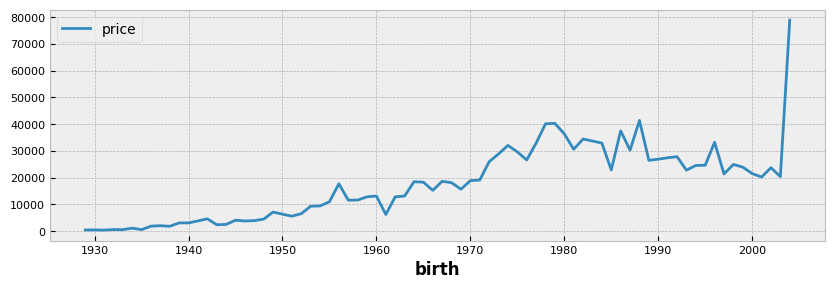

In [85]:
fig, ax = plt.subplots(figsize = (10,3))
p_table.plot(ax=ax);

### Création de la colonne 'age_group'


In [86]:
ctp_df.loc[(ctp_df['age'] >= 19) & (ctp_df['age'] <= 29 ), 'age_group'] = 'de 18 à 29'
ctp_df.loc[(ctp_df['age'] >= 30) & (ctp_df['age'] <= 39 ), 'age_group'] = 'de 30 à 39'
ctp_df.loc[(ctp_df['age'] >= 40) & (ctp_df['age'] <= 49 ), 'age_group'] = 'de 40 à 49'
ctp_df.loc[(ctp_df['age'] >= 50) & (ctp_df['age'] <= 59 ), 'age_group'] = 'de 50 à 59'
ctp_df.loc[(ctp_df['age'] >= 60) & (ctp_df['age'] <= 69 ), 'age_group'] = 'de 60 à 69'
ctp_df.loc[(ctp_df['age'] >= 70) & (ctp_df['age'] <= 79 ), 'age_group'] = 'de 70 à 79'
ctp_df.loc[(ctp_df['age'] >= 80) & (ctp_df['age'] <= 89 ), 'age_group'] = 'de 80 à 89'
ctp_df.loc[(ctp_df['age'] >= 90) & (ctp_df['age'] <= 100), 'age_group'] = 'de 90 à 100'

ctp_df.head()

client_id sex   birth id_prod                       date session_id  \
0    c_4410   f  1967.0  0_1316 2021-12-29 09:11:18.860592   s_141762   
1    c_4410   f  1967.0  0_1316 2022-03-29 09:11:18.860592   s_186233   
2    c_4430   m  1986.0  0_1316 2021-05-03 16:41:38.212848    s_29404   
3     c_267   f  1973.0  0_1316 2022-01-15 23:48:09.260347   s_150401   
4    c_8158   m  1984.0  0_1316 2021-07-10 14:11:24.280739    s_60466   

        time  price  categ   age   age_group  
0 2021-12-29    7.2    0.0  56.0  de 50 à 59  
1 2022-03-29    7.2    0.0  56.0  de 50 à 59  
2 2021-05-03    7.2    0.0  37.0  de 30 à 39  
3 2022-01-15    7.2    0.0  50.0  de 50 à 59  
4 2021-07-10    7.2    0.0  39.0  de 30 à 39

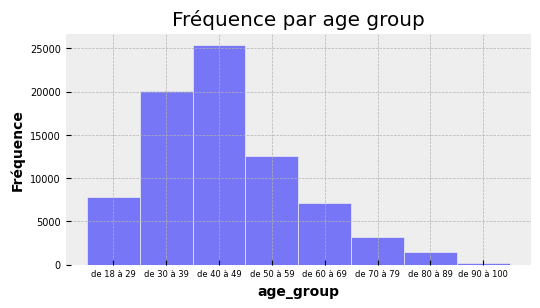

In [87]:
ctp_df_age_group = ctp_df.sort_values(by='age_group')
fig, ax = plt.subplots(figsize=(6, 3))

sns.histplot(ctp_df_age_group, x='age_group', kde=False, bins=None, color='blue', alpha=0.5)
plt.xlabel('age_group', fontsize=10)
plt.ylabel('Fréquence', fontsize=10)
plt.xticks(fontsize=6)
plt.yticks(fontsize=7)
sns.despine(left=True, bottom=True)
plt.title("Fréquence par age group");

In [88]:
ctp_df['panier_mean'] = ctp_df.groupby('client_id')['price'].transform('mean').round(2)
ctp_df["nb_achat"] = ctp_df.groupby('client_id')['price'].transform('count')
ctp_df["total_achat"] = ctp_df.groupby('client_id')['price'].transform('sum')

In [89]:
ctp_df.head(2)

client_id sex   birth id_prod                       date session_id  \
0    c_4410   f  1967.0  0_1316 2021-12-29 09:11:18.860592   s_141762   
1    c_4410   f  1967.0  0_1316 2022-03-29 09:11:18.860592   s_186233   

        time  price  categ   age   age_group  panier_mean  nb_achat  \
0 2021-12-29    7.2    0.0  56.0  de 50 à 59        16.49        10   
1 2022-03-29    7.2    0.0  56.0  de 50 à 59        16.49        10   

   total_achat  
0       164.86  
1       164.86

# 3 . Analyse du chiffre d'affaires

### Par jour

In [90]:
ca_jour = ctp_df.groupby('time').sum()['price']
ca_jour_total = ca_jour.reset_index()
ca_jour_total.head()

time    price
0 2021-03-01  1757.16
1 2021-03-02  1660.45
2 2021-03-03  1938.61
3 2021-03-04  2023.43
4 2021-03-05  2057.59

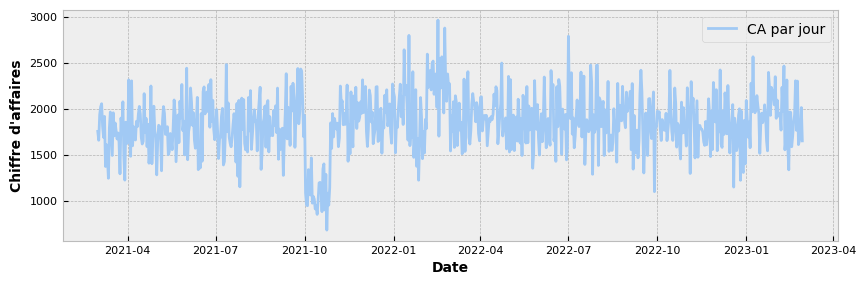

In [91]:
plt.figure(figsize = (10,3))
sns.set_palette('pastel')
ca = sns.lineplot( x= 'time', y = 'price',data= ca_jour_total,label='CA par jour')
ca.set_xlabel('Date', size = 10)
ca.set_ylabel("Chiffre d'affaires", size = 10);

### CA par catégorie

In [92]:
pv_sum = ctp_df.pivot_table('price', index = ['time'],
                 columns = 'categ', aggfunc = 'sum')
pv_sum.head()

categ          0.0     1.0     2.0
time                              
2021-03-01  610.65  775.02  371.49
2021-03-02  727.97  638.79  293.69
2021-03-03  787.79  867.70  283.12
2021-03-04  659.09  647.86  716.48
2021-03-05  717.17  716.17  624.25

### Nombre de ventes par catégorie

In [93]:
pv_df = ctp_df.pivot_table('price', index = ['time'],
                 columns = 'categ', aggfunc = 'count')
pv_df.head()

categ        0.0   1.0  2.0
time                       
2021-03-01  52.0  37.0  6.0
2021-03-02  69.0  32.0  5.0
2021-03-03  76.0  45.0  3.0
2021-03-04  62.0  34.0  9.0
2021-03-05  61.0  36.0  8.0

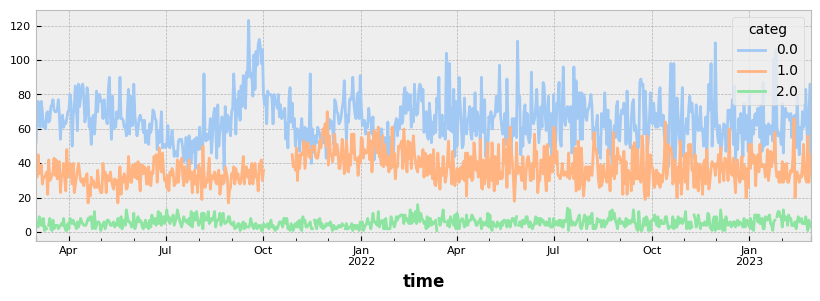

In [94]:
fig, ax = plt.subplots(figsize = (10,3))
pv_df.plot(ax=ax);

In [95]:
ctp_df.loc[:, 'pr_month'] = ctp_df['time'].dt.to_period(freq='M').dt.to_timestamp().dt.strftime('%Y-%m-%d')
ctp_df.loc[:, 'pr_year'] = ctp_df['time'].dt.year

In [96]:
ctp_df.head()

client_id sex   birth id_prod                       date session_id  \
0    c_4410   f  1967.0  0_1316 2021-12-29 09:11:18.860592   s_141762   
1    c_4410   f  1967.0  0_1316 2022-03-29 09:11:18.860592   s_186233   
2    c_4430   m  1986.0  0_1316 2021-05-03 16:41:38.212848    s_29404   
3     c_267   f  1973.0  0_1316 2022-01-15 23:48:09.260347   s_150401   
4    c_8158   m  1984.0  0_1316 2021-07-10 14:11:24.280739    s_60466   

        time  price  categ   age   age_group  panier_mean  nb_achat  \
0 2021-12-29    7.2    0.0  56.0  de 50 à 59        16.49        10   
1 2022-03-29    7.2    0.0  56.0  de 50 à 59        16.49        10   
2 2021-05-03    7.2    0.0  37.0  de 30 à 39        36.30         4   
3 2022-01-15    7.2    0.0  50.0  de 50 à 59        12.04        20   
4 2021-07-10    7.2    0.0  39.0  de 30 à 39        11.52         7   

   total_achat    pr_month  pr_year  
0       164.86  2021-12-01     2021  
1       164.86  2022-03-01     2022  
2       145.21  2021-05-01     2021  
3       240.77  2022-01-01     2022  
4        80.61  2021-07-01     2021

### Evolution du chiffre d'affaires et total ventes

In [97]:
df_by_year_month = ctp_df.groupby('pr_month').agg(total_sales=('pr_month', 'count'),
                                                  revenue=('price', 'sum')).reset_index()

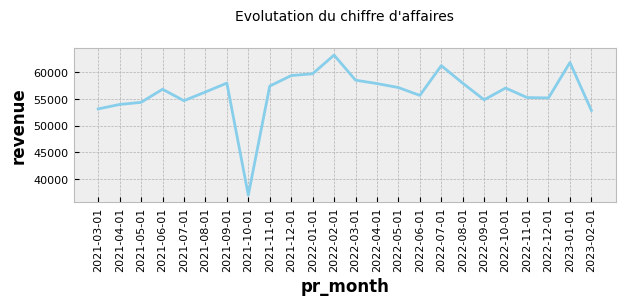

In [98]:
plt.figure(figsize=(7,2))

lineplot = sns.lineplot(x="pr_month", y="revenue", color='skyblue',
                        data=df_by_year_month)
plt.xticks(rotation=90)
plt.title("Evolutation du chiffre d'affaires", pad=20, fontsize = 10);

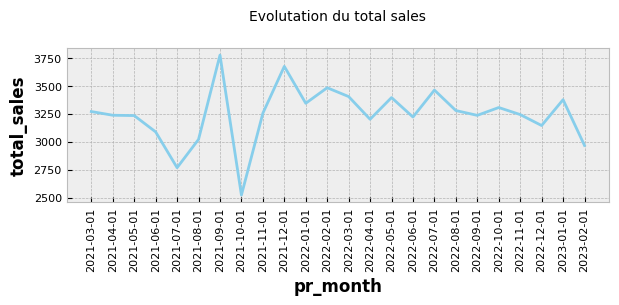

In [99]:
plt.figure(figsize=(7,2))

lineplot = sns.lineplot(x="pr_month", y="total_sales", color='skyblue',
                        data=df_by_year_month)
plt.xticks(rotation=90)
plt.title("Evolutation du total sales", pad=20,  fontsize = 10);

### CA et total ventes en 2021 et en 2022

In [100]:
ctp_df['fiscal_year'] = 2021
ctp_df['fiscal_year'].loc[ctp_df[ctp_df['time'] >= '2022-03-01'].index] = 2022

In [101]:
list_fiscal_years = list(ctp_df['fiscal_year'].unique())
list_fiscal_years.sort()

In [102]:
list_categ = list(products['categ'].unique())
list_categ

[0, 1, 2]

In [103]:
df_categ_dict = {}

for i in list_categ :
    df_temp = ctp_df[ctp_df['categ'] == i]

    df_temp = df_temp.groupby(['fiscal_year', 'pr_month']).agg(
        total_sales=('pr_month', 'count'), revenue=('price', 'sum')
        ).reset_index()

    df_temp['AOV'] = df_temp['revenue'] / df_temp['total_sales']
    df_temp = df_temp.drop(df_temp[df_temp.pr_month == 'Oct'].index)

    df_categ_dict[i] = df_temp

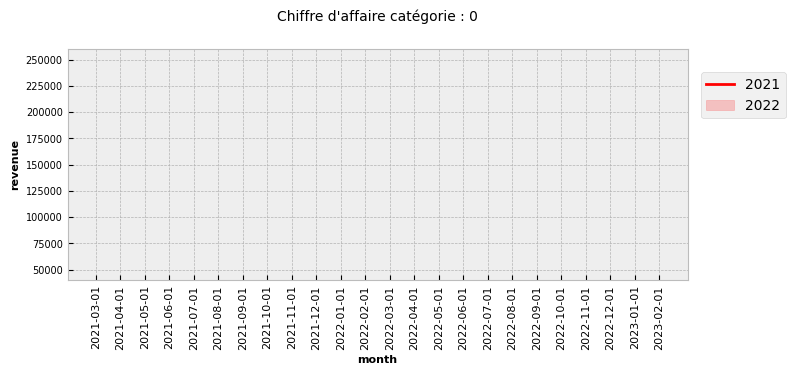

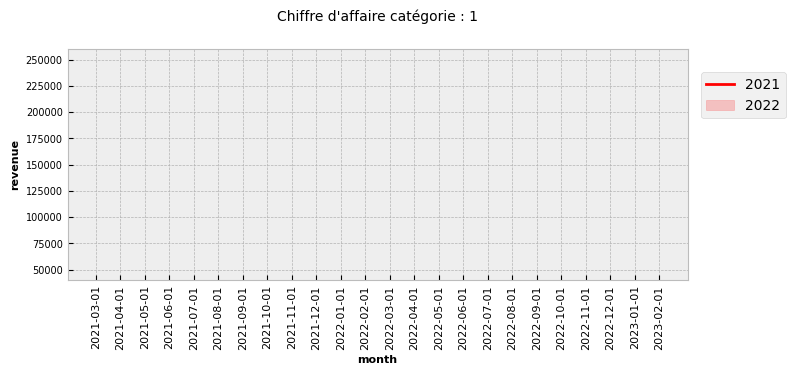

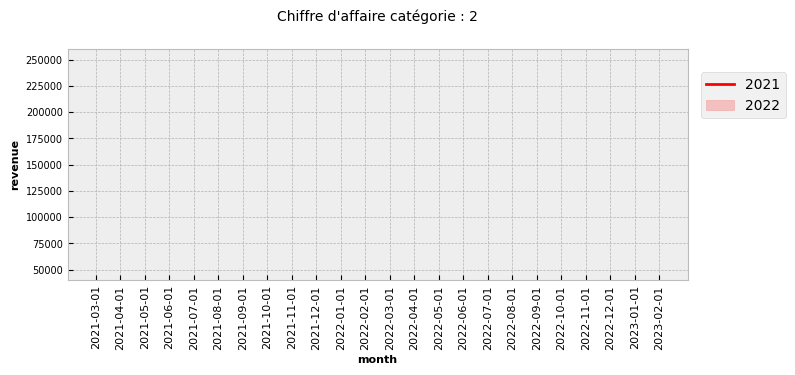

In [104]:
for categ in df_categ_dict:
    df_temp = df_categ_dict[categ]

    plt.figure(figsize=(8,3))
    sns.lineplot(x="pr_month", y="revenue", data=df_temp, hue='fiscal_year', palette=["red", "green"])
    plt.ylim(40000,260000)
    plt.legend(labels=["2021", "2022"],loc='center right', bbox_to_anchor=(1.17, 0.8), ncol=1, fontsize=10)
    plt.title("Chiffre d'affaire catégorie : %i" %categ, pad=20, fontsize= 10)
    plt.ylabel("revenue",fontsize=8)
    plt.xlabel('month',fontsize=8)
    plt.xticks(rotation = 90,fontsize=8)
    plt.yticks(fontsize=7)
    plt.show()

In [105]:
ctp_df.groupby('pr_year')['price'].sum()

pr_year
2021    540977.55
2022    693539.10
2023    114650.53
Name: price, dtype: float64

In [106]:
ctp_df.groupby('pr_year')['id_prod'].count()

pr_year
2021    31845
2022    39719
2023     6343
Name: id_prod, dtype: int64

### CA et total ventes en 2021 et en 2022 avec les moyennes mobiles

In [107]:
ctp_df['fiscal_year'] = 2021
ctp_df['fiscal_year'].loc[ctp_df[ctp_df['time'] >= '2022-03-01'].index] = 2022

In [108]:
list_fiscal_years = list(ctp_df['fiscal_year'].unique())
list_fiscal_years.sort()
list_fiscal_years

[2021, 2022]

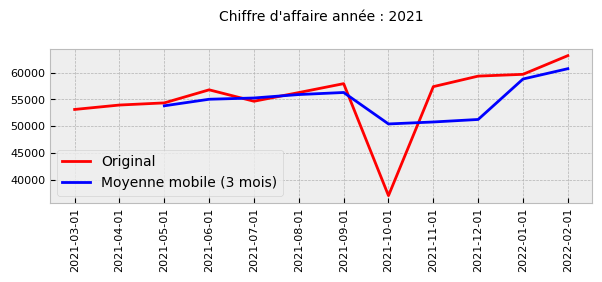

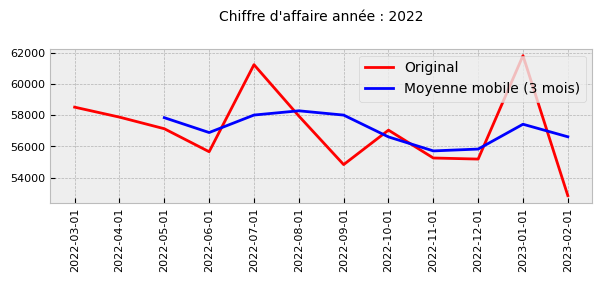

In [109]:
for fiscal_year in list_fiscal_years:

    df_temp = ctp_df[ctp_df['fiscal_year'] == fiscal_year]
    df_temp = df_temp.groupby('pr_month').agg(
        total_sales=('pr_month', 'count'), revenue=('price', 'sum')).reset_index()
    df_temp = df_temp[['pr_month', 'revenue']].set_index('pr_month')
    rolling_mean = df_temp.rolling(window = 3).mean()

    plt.figure(figsize=(7,2))
    plt.plot(df_temp, color = 'red', label = 'Original')
    plt.plot(rolling_mean, color = 'blue', label = 'Moyenne mobile (3 mois)')
    plt.xticks(rotation=90)
    plt.legend(loc = 'best')
    plt.title("Moyenne mobiles chiffre d'affaire", fontsize = 8)
    plt.title("Chiffre d'affaire année : %i" % fiscal_year, pad=20, fontsize = 10)
    plt.show()

* Pour l'année 2021, on observe une tendance haussière du chiffre d'affaires au cours de l'année, à l'exception d'une chute enregistrée au mois d'octobre. Globalement, le chiffre d'affaires a augmenté sur cette période.
* En ce qui concerne l'année 2022, le chiffre d'affaires est resté globalement stable tout au long de l'année.

In [110]:
df_ca = ctp_df.groupby('fiscal_year').sum().reset_index()

# chiffre d'affaire année fiscale 2021
df_ca_2021 = df_ca[(df_ca['fiscal_year'] == 2021)]
ca_2021 = df_ca.iloc[0]['price']

# chiffre d'affaire année fiscale 2021
df_ca_2022 = df_ca[(df_ca['fiscal_year'] == 2022)]
ca_2022 = df_ca_2022.iloc[0]['price']

# difference chiffre d'affaire
diff_ca = ca_2022 - ca_2021

# evolution
evo_ca = round(( diff_ca / ca_2021) * 100 ,2)

In [111]:
print(f"""
Chiffre d'affaire année 2021 : {ca_2021:.0f}
Chiffre d'affaire année 2022 : {ca_2022:.0f}

Différence de chiffre d'affaire : {diff_ca:.0f} ({evo_ca}%)
""")


Chiffre d'affaire année 2021 : 663876
Chiffre d'affaire année 2022 : 685291

Différence de chiffre d'affaire : 21415 (3.23%)



Le chiffre d'affaire de l'année fiscale 2022 est suppérieur à celui de 2021.

In [112]:
df_id_prod = ctp_df.groupby('pr_year')['id_prod'].count()

# years
sales_2021 = df_id_prod[2021]
sales_2022 = df_id_prod[2022]
sales_2023 = df_id_prod[2023]

increase_2022 = round(((sales_2022 - sales_2021) / sales_2021) * 100, 2)
increase_2023 = round(((sales_2023 - sales_2022) / sales_2022) * 100, 2)

print("2021: ", sales_2021)
print("2022: ", sales_2022)
print("L'augmentation des ventes totales en 2022 par rapport à 2021:", increase_2022, "%")

2021:  31845
2022:  39719
L'augmentation des ventes totales en 2022 par rapport à 2021: 24.73 %


### Croissance de 2021 à 2022

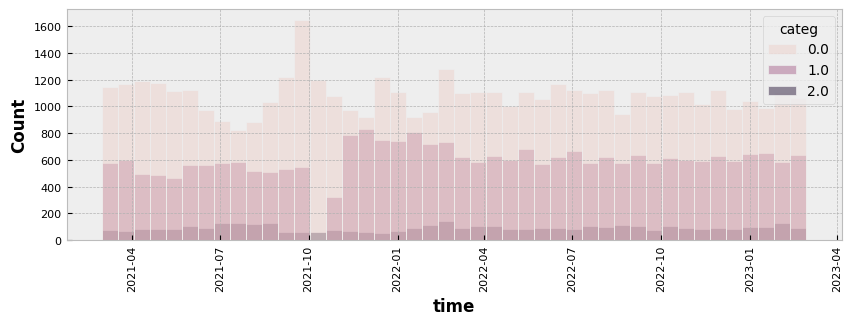

In [113]:
fig = plt.figure(figsize=(10, 3))

sns.histplot(data=ctp_df, x='time', hue='categ')
plt.xticks(rotation=90, size = 8);

In [114]:
pv_df= ctp_df.pivot_table('price', index = ['pr_year'],
                 columns = 'categ', aggfunc = 'sum', margins=True)
pv_df.head()

categ          0.0        1.0        2.0         All
pr_year                                             
2021     215447.33  204923.40  120606.82   540977.55
2022     250477.03  283883.54  159178.53   693539.10
2023      39725.47   46348.95   28576.11   114650.53
All      505649.83  535155.89  308361.46  1349167.18

In [115]:
pv_df= ctp_df.pivot_table('price', index = ['pr_year'],
                 columns = 'categ', aggfunc = 'count', margins=True)
pv_df.head()

categ      0.0    1.0   2.0    All
pr_year                           
2021     20289  10003  1553  31845
2022     23647  13954  2118  39719
2023      3722   2250   371   6343
All      47658  26207  4042  77907

In [116]:
croissance_2021_2022 = (pv_df.loc[2022, :] - pv_df.loc[2021, :]) / pv_df.loc[2021, :] * 100
print("Croissance de 2021 à 2022 :\n", croissance_2021_2022)

Croissance de 2021 à 2022 :
 categ
0.0    16.550840
1.0    39.498151
2.0    36.381198
All    24.726017
dtype: float64


In [117]:
pv_sexe= ctp_df.pivot_table('price', index = ['pr_year'],
                 columns = 'sex', aggfunc = 'count', margins=True)
pv_sexe.head()

sex          f      m    All
pr_year                     
2021     16552  15293  31845
2022     20800  18919  39719
2023      3356   2987   6343
All      40708  37199  77907

In [118]:
croissance_2021_2022 = (pv_sexe.loc[2022, :] - pv_sexe.loc[2021, :]) / pv_sexe.loc[2021, :] * 100
print("Croissance de 2021 à 2022 :\n", croissance_2021_2022)

Croissance de 2021 à 2022 :
 sex
f      25.664572
m      23.710194
All    24.726017
dtype: float64


In [119]:
pv_age= ctp_df.pivot_table('price', index = ['pr_year'],
                 columns = 'age_group', aggfunc = 'sum', margins=True)
pv_age.head()

age_group  de 18 à 29  de 30 à 39  de 40 à 49  de 50 à 59  de 60 à 69  \
pr_year                                                                 
2021        124653.15   120542.19   138379.81    78530.48    46937.18   
2022        162655.09   150934.59   172146.66   103209.75    62416.79   
2023         30243.71    25040.00    26325.89    15683.39    10301.51   
All         317551.95   296516.78   336852.36   197423.62   119655.48   

age_group  de 70 à 79  de 80 à 89  de 90 à 100         All  
pr_year                                                     
2021         21422.79     9543.42       968.53   540977.55  
2022         27841.66    13069.72      1264.84   693539.10  
2023          4710.19     2025.00       320.84   114650.53  
All          53974.64    24638.14      2554.21  1349167.18

In [120]:
croissance_2021_2022 = (pv_age.loc[2022, :] - pv_age.loc[2021, :]) / pv_age.loc[2021, :] * 100
print("Croissance de 2021 à 2022 :\n", croissance_2021_2022)

Croissance de 2021 à 2022 :
 age_group
de 18 à 29     30.486145
de 30 à 39     25.213081
de 40 à 49     24.401573
de 50 à 59     31.426358
de 60 à 69     32.979421
de 70 à 79     29.962811
de 80 à 89     36.950066
de 90 à 100    30.593786
All            28.201087
dtype: float64


### CA et Moyenne mobile

In [121]:
ca_jour =  ctp_df.groupby('time').sum()['price']
ca_journalier = ca_jour.reset_index()
ca_journalier.set_index('time', inplace=True)
ca_journalier['Moyenne mobile sur 15 jours'] = ca_journalier['price'].rolling(15).mean()
ca_journalier.head(5)

price  Moyenne mobile sur 15 jours
time                                            
2021-03-01  1757.16                          NaN
2021-03-02  1660.45                          NaN
2021-03-03  1938.61                          NaN
2021-03-04  2023.43                          NaN
2021-03-05  2057.59                          NaN

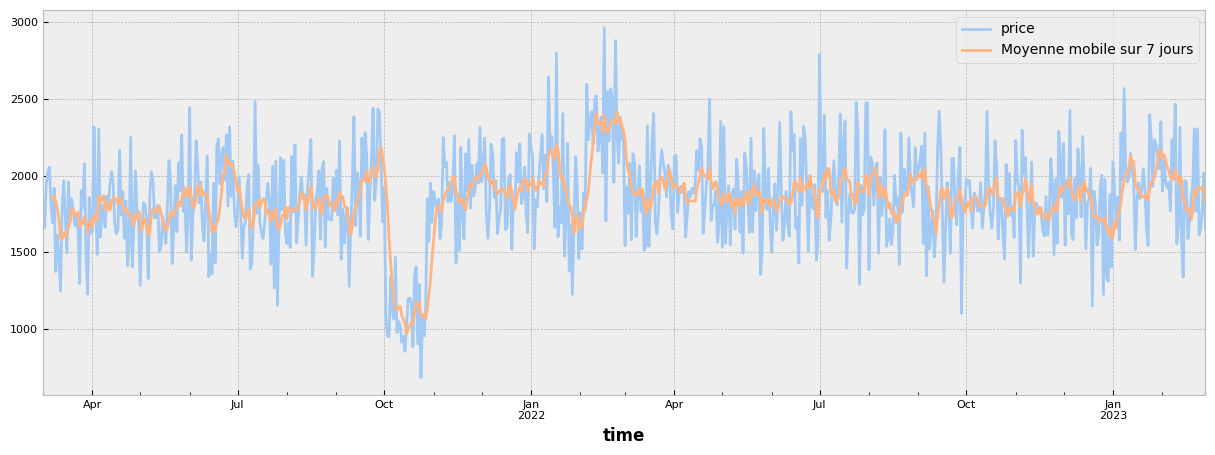

In [122]:
ca_journalier['Moyenne mobile sur 7 jours'] = ca_journalier['price'].rolling(7).mean()
var = ['price', 'Moyenne mobile sur 7 jours']
ca_journalier[var].plot(figsize=(15, 5));

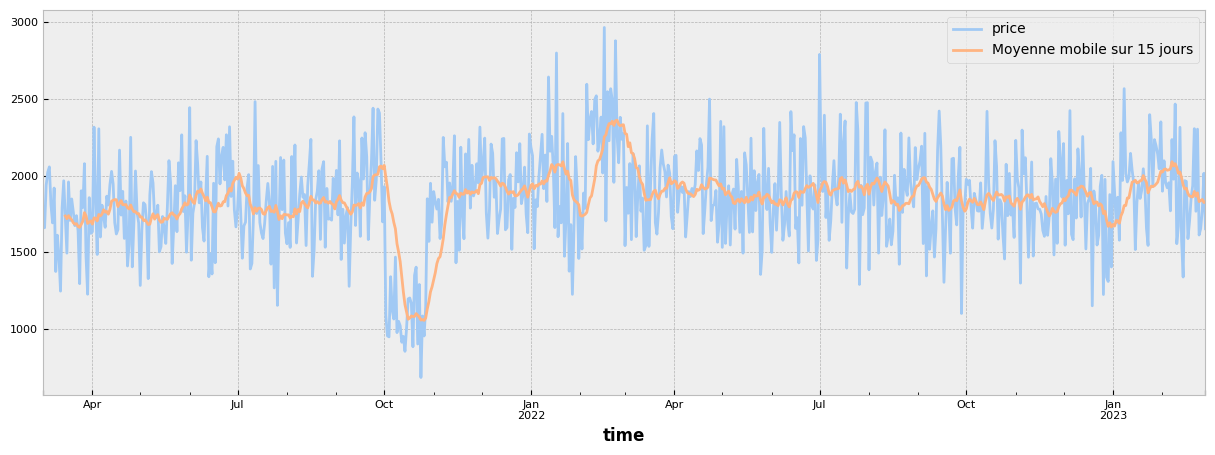

In [123]:
ca_journalier['Moyenne mobile sur 15 jours'] = ca_journalier['price'].rolling(15).mean()
var = ['price', 'Moyenne mobile sur 15 jours']
ca_journalier[var].plot(figsize=(15, 5));

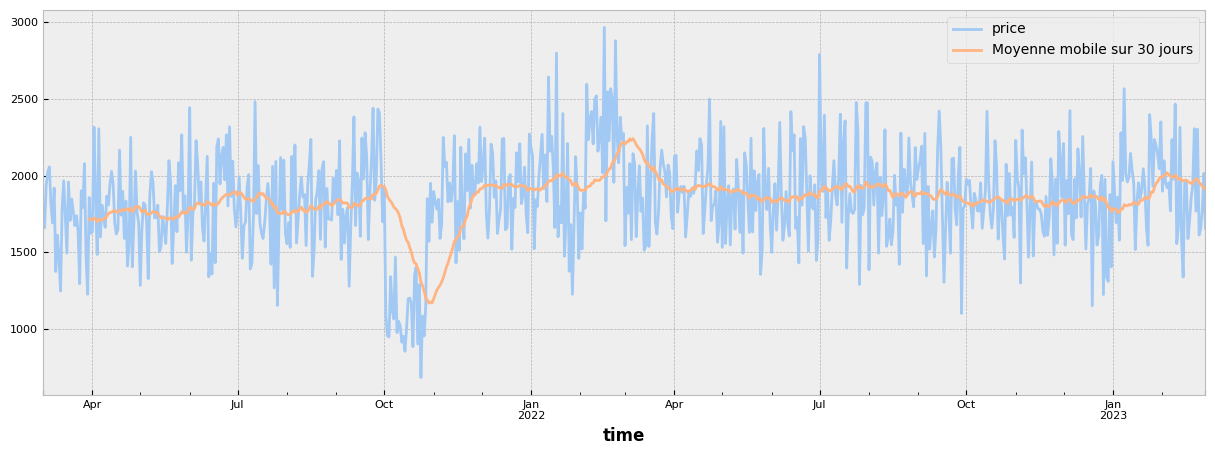

In [124]:
ca_journalier['Moyenne mobile sur 30 jours'] = ca_journalier['price'].rolling(30).mean()
var = ['price', 'Moyenne mobile sur 30 jours']
ca_journalier[var].plot(figsize=(15, 5));

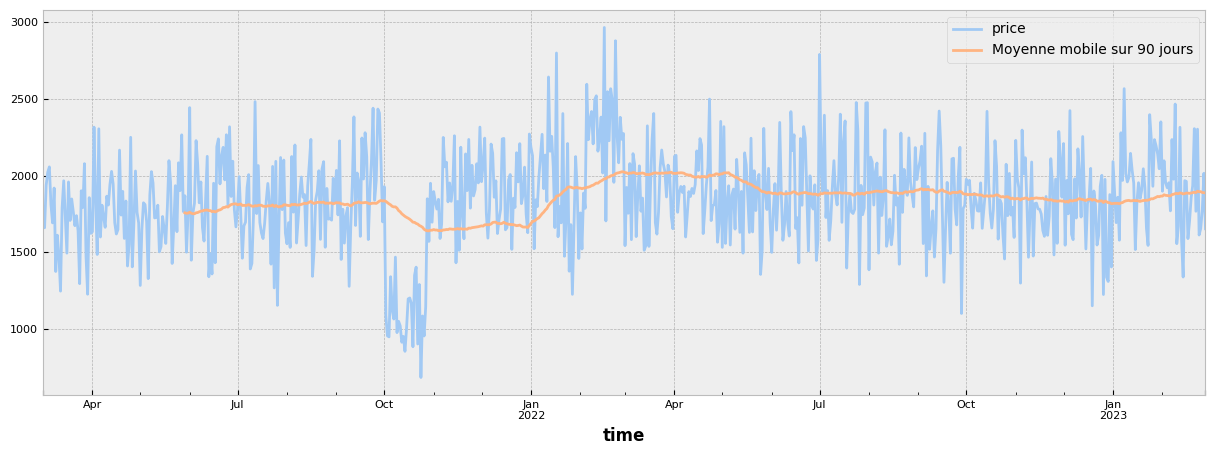

In [125]:
ca_journalier['Moyenne mobile sur 90 jours'] = ca_journalier['price'].rolling(90).mean()
var = ['price', 'Moyenne mobile sur 90 jours']
ca_journalier[var].plot(figsize=(15, 5));

### Chiffre d'affaires par âge et par sexe

In [126]:
age_group_ca = ctp_df.groupby(['age_group','sex']).sum()['price'].reset_index()
age_group_ca.head()

age_group sex      price
0  de 18 à 29   f  165146.92
1  de 18 à 29   m  152405.03
2  de 30 à 39   f  149442.21
3  de 30 à 39   m  147074.57
4  de 40 à 49   f  178899.87

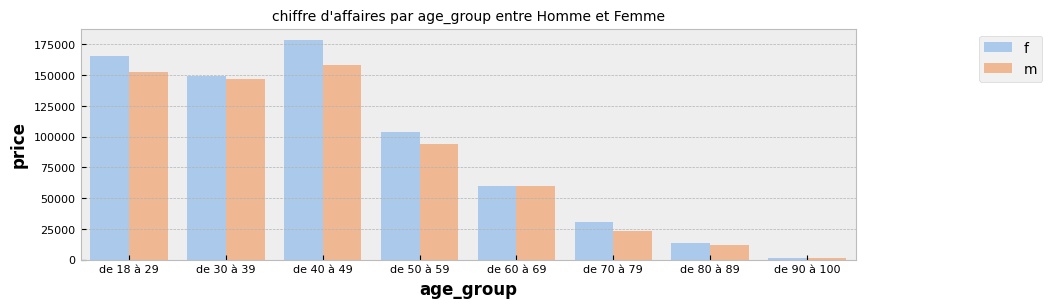

In [127]:
fig, ax = plt.subplots(figsize=(10, 3))

sns.barplot(data=age_group_ca, x="age_group", y="price", hue="sex", ax=ax)
plt.title("chiffre d'affaires par age_group entre Homme et Femme", fontsize=10)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), fontsize=10);

### Comparaison du chiffre d'affaires par sex

In [128]:
year_sex = ctp_df.groupby(['pr_year', 'sex']).sum().reset_index()
year_sex

pr_year sex       birth      price   categ       age  panier_mean  \
0     2021   f  32732539.0  280148.22  6845.0  752157.0    283530.30   
1     2021   m  30246376.0  260829.33  6264.0  691363.0    263500.02   
2     2022   f  41131228.0  362197.25  9548.0  947172.0    359550.89   
3     2022   m  37418386.0  331341.85  8642.0  854751.0    329725.58   
4     2023   f   6635392.0   59949.40  1578.0  153796.0     59212.11   
5     2023   m   5909894.0   54701.13  1414.0  132807.0     53642.77   

   nb_achat  total_achat  fiscal_year  
0    290097   4280743.86     33451592  
1    266501   3946236.09     30907153  
2    364530   5424599.23     42053941  
3    330206   4935331.24     38251050  
4     59237    889904.46      6785832  
5     52450    794583.86      6039714

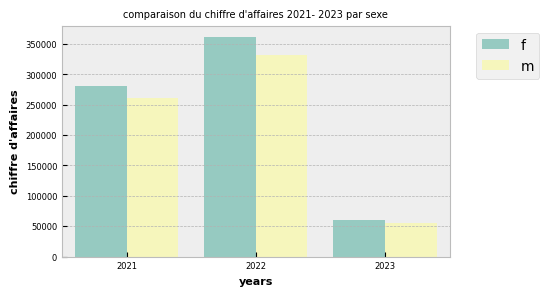

In [129]:
plt.figure(figsize=(5,3))
plt.xticks(fontsize= 6)
plt.yticks(fontsize= 6)
t = sns.barplot(x='pr_year', y='price', hue='sex', data=year_sex, palette='Set3',dodge=0.8)
t.set_xlabel("years", fontsize = 8)
t.set_ylabel("chiffre d'affaires", fontsize = 8)
plt.title("comparaison du chiffre d'affaires 2021- 2023 par sexe",fontsize = 7)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), fontsize=10);

In [130]:
ctp_df_ca = ctp_df.groupby(['pr_year','categ']).sum()['price']
df_categ = ctp_df_ca.reset_index()
df_categ.head()

pr_year  categ      price
0     2021    0.0  215447.33
1     2021    1.0  204923.40
2     2021    2.0  120606.82
3     2022    0.0  250477.03
4     2022    1.0  283883.54

### Par categorie

In [131]:
prod = ctp_df.groupby(['id_prod','categ']).sum()['price']
prod_sort =prod.sort_values(ascending = False).reset_index()
prod_sort.head()

id_prod  categ     price
0   2_159    2.0  11387.22
1   2_135    2.0   8761.73
2   2_112    2.0   7500.27
3   2_209    2.0   7488.93
4   1_369    1.0   6693.21

In [132]:
categ_prod = prod_sort.groupby('categ').count()
categ_count = categ_prod.reset_index()
categ_count

categ  id_prod  price
0    0.0     2022   2022
1    1.0      692    692
2    2.0      199    199

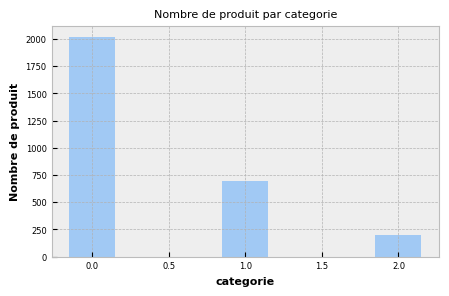

In [133]:
plt.figure(figsize=(5, 3))
plt.bar(categ_count.categ, categ_count.price, width=0.3)
plt.xlabel('categorie',fontsize=8)
plt.ylabel('Nombre de produit',fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.title('Nombre de produit par categorie',fontsize=8);

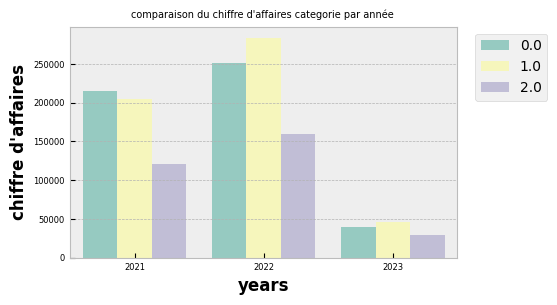

In [134]:
# le lien entre le genre d’un client et les catégories des livres achetés

plt.figure(figsize=(5,3))
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
j = sns.barplot(x='pr_year', y='price', hue='categ', data=df_categ, palette='Set3')
j.set_xlabel("years")
j.set_ylabel("chiffre d'affaires")
plt.title("comparaison du chiffre d'affaires categorie par année ", fontsize = 7)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), fontsize=10);

In [135]:
prod = ctp_df.groupby(['id_prod','categ']).sum()['price']
prod_sort = prod.sort_values(ascending = False).reset_index()
prod_sort.head()

id_prod  categ     price
0   2_159    2.0  11387.22
1   2_135    2.0   8761.73
2   2_112    2.0   7500.27
3   2_209    2.0   7488.93
4   1_369    1.0   6693.21

In [136]:
categ_prod_count = prod_sort.groupby('categ').count()
categ_count = categ_prod_count.reset_index()
categ_count

categ  id_prod  price
0    0.0     2022   2022
1    1.0      692    692
2    2.0      199    199

In [137]:
categ_prod = prod_sort.groupby('categ').sum()['price']
categ_ca=categ_prod.reset_index()
categ_ca

categ      price
0    0.0  505649.83
1    1.0  535155.89
2    2.0  308361.46

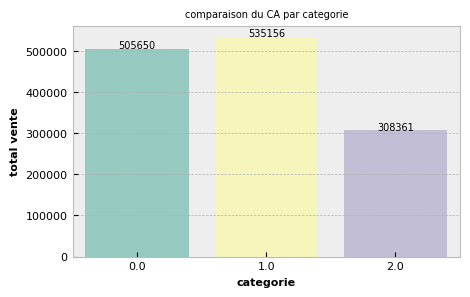

In [138]:
plt.figure(figsize=(5,3))
cnt = sns.barplot(x='categ', y='price',data=categ_ca, palette='Set3')
cnt.set_xlabel("categorie",fontsize=8)
cnt.set_ylabel("total vente",fontsize=8)

for i, value in enumerate(categ_ca['price']):
    cnt.text(i, value, f'{value:.0f}', ha='center', fontsize = 7)

    plt.title("comparaison du CA par categorie" , fontsize=7);

In [139]:
ctp_df['categ'].value_counts(normalize=True).sort_values(ascending = False).round(3)

0.0    0.612
1.0    0.336
2.0    0.052
Name: categ, dtype: float64

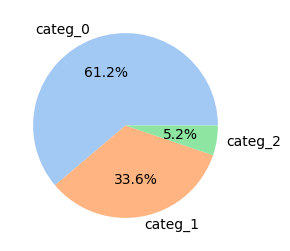

In [140]:
plt.figure(figsize=(3, 3))
colors = ['#66B2FF', '#0072B2', '#003C71']
categorie = ['categ_0', 'categ_1', 'categ_2']
values = [0.612, 0.336, 0.052]
plt.pie(values, labels=categorie, autopct='%.1f%%',textprops={'fontsize': 10})
plt.rcParams.update({'font.size': 7}) ;

## Test Anova : chiffre d'affaires et les categories

* Ho : Il n'y a pas de différence significative entre les moyennes des chiffres d'affaires des différentes catégories de produits
* Ha : Il y a une différence significative entre les moyennes des chiffres d'affaires des différentes catégories de produits.

In [141]:
# Obtenir les valeurs des chiffres d'affaires pour chaque catégorie
from scipy.stats import f_oneway, levene, ttest_ind

categ_0 = prod_sort[prod_sort['categ'] == 0]['price']
categ_1 = prod_sort[prod_sort['categ'] == 1]['price']
categ_2 = prod_sort[prod_sort['categ'] == 2]['price']

f_stat, p_value = stats.f_oneway(categ_0, categ_1, categ_2)

print("Statistique F :", f_stat)
print("Valeur p :", p_value)


Statistique F : 308.5481767111989
Valeur p : 2.9654641864917846e-122


* Cela signifie que l'hypothèse nulle peut être rejetée et que les moyennes sont significativement différentes. Sinon, l'hypothèse nulle ne peut pas être rejetée et il n'y a pas suffisamment de preuves pour prouver une différence significative entre les moyennes.

## Test Anova : chiffre d'affaires et les genres

* Les genres influencent - ils mon chiffre d'affaires ?

* H0 : Mon chiffre d'affaires n'est pas influencé par les genres.
* H1 : Mon chiffre d'affaires est influencé par les genres.

In [142]:
from scipy.stats import f_oneway, levene, ttest_ind

f, p = levene(ctp_df.loc[ctp_df["sex"]=="f", "price"], ctp_df.loc[ctp_df["sex"]=="m", "price"])

if p < 0.05:
    f, p = f_oneway(ctp_df.loc[ctp_df["sex"]=="f", "price"], ctp_df.loc[ctp_df["sex"]=="m", "price"])
    if p < 0.05:
        print("Il y a une différence significative entre les groupes.")
    else:
        print("Il n'y a pas de différence significative entre les groupes.")

else:
    t, p = ttest_ind(ctp_df.loc[ctp_df["sex"]=="f", "price"], ctp_df.loc[ctp_df["sex"]=="m", "price"], equal_var=False)
    if p < 0.05:
        print("Il y a une différence significative entre les groupes.")
    else:
        print("Il n'y a pas de différence significative entre les groupes.")

print("La p-value est de :", p)


Il n'y a pas de différence significative entre les groupes.
La p-value est de : 0.29116149472674674


###  Tranche d'âge

In [143]:
prod = ctp_df.pivot_table('price', index = ['age_group'],
                 columns = 'categ', aggfunc = 'sum')
prod_reset = prod.reset_index()
prod_reset

categ    age_group        0.0        1.0        2.0
0       de 18 à 29   18824.74   59462.38  239264.83
1       de 30 à 39  155108.67   99581.01   41827.10
2       de 40 à 49  203998.27  122457.69   10396.40
3       de 50 à 59   71759.38  117642.20    8022.04
4       de 60 à 69   33517.70   81225.80    4911.98
5       de 70 à 79   14929.51   35979.05    3066.08
6       de 80 à 89    6919.07   16846.04     873.03
7      de 90 à 100     592.49    1961.72        NaN

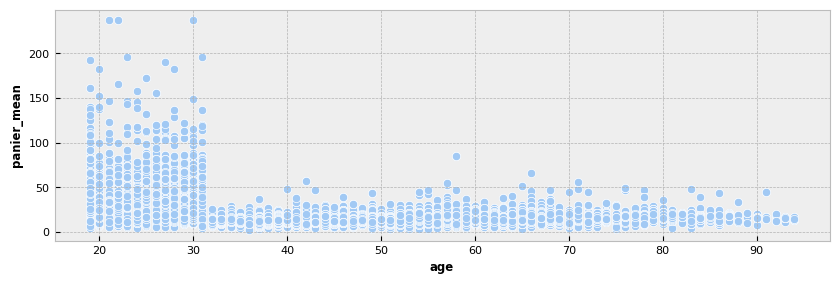

In [144]:
plt.figure(figsize=(10,3))

sns.scatterplot(x = 'age', y = 'panier_mean', data = ctp_df);

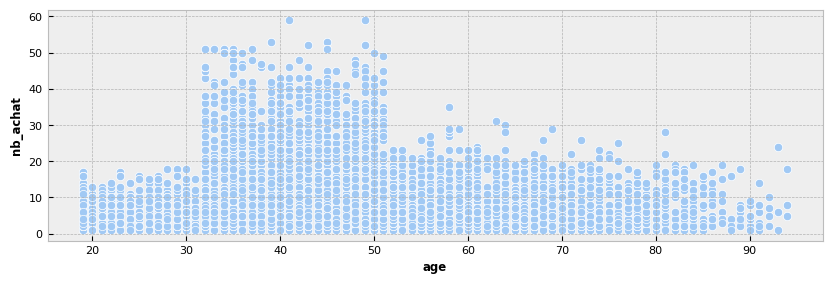

In [145]:
plt.figure(figsize=(10,3))

sns.scatterplot(x = 'age', y = 'nb_achat', data = ctp_df);

<Figure size 1000x300 with 0 Axes>

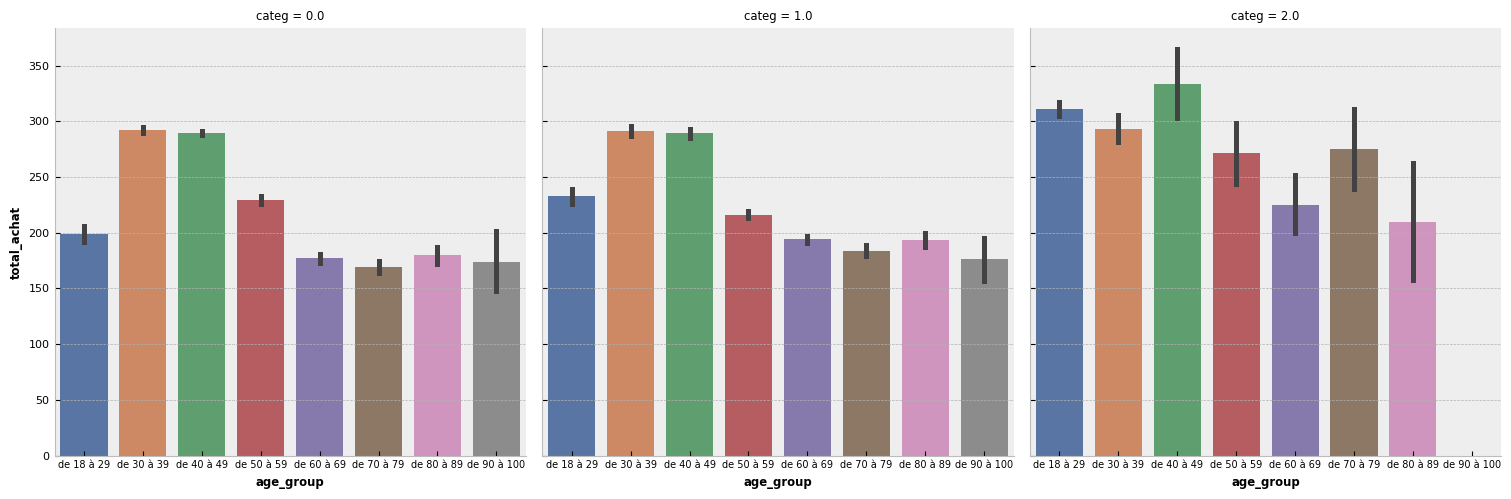

In [146]:
plt.figure(figsize=(10, 3))
colors = sns.color_palette("deep", 8)

sorted_df = ctp_df.sort_values("age_group", ascending=True)

c = sns.catplot(data=sorted_df, x = "age_group", y = "total_achat",
             kind= "bar", col = "categ", col_wrap = 4, palette=colors)
c.set_xticklabels(fontsize=7);

<Figure size 500x500 with 0 Axes>

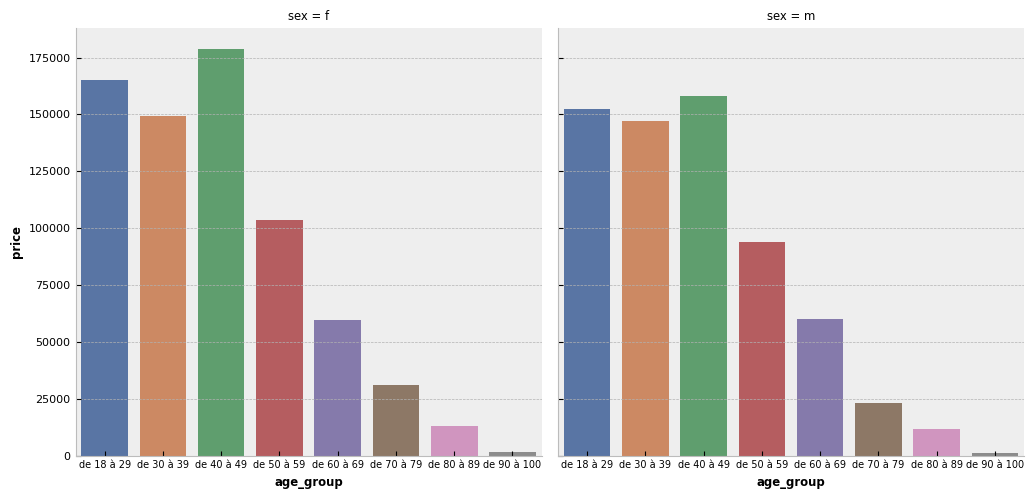

In [147]:
## le lien entre l’âge des clients et le montant total des achats,
plt.figure(figsize=(5, 5))

colors = sns.color_palette("deep", 8)

v = sns.catplot(data=age_group_ca, x="age_group", y="price",
                kind="bar", col="sex", col_wrap=4, palette=colors)
v.set_xticklabels(fontsize=7);

<Figure size 1000x300 with 0 Axes>

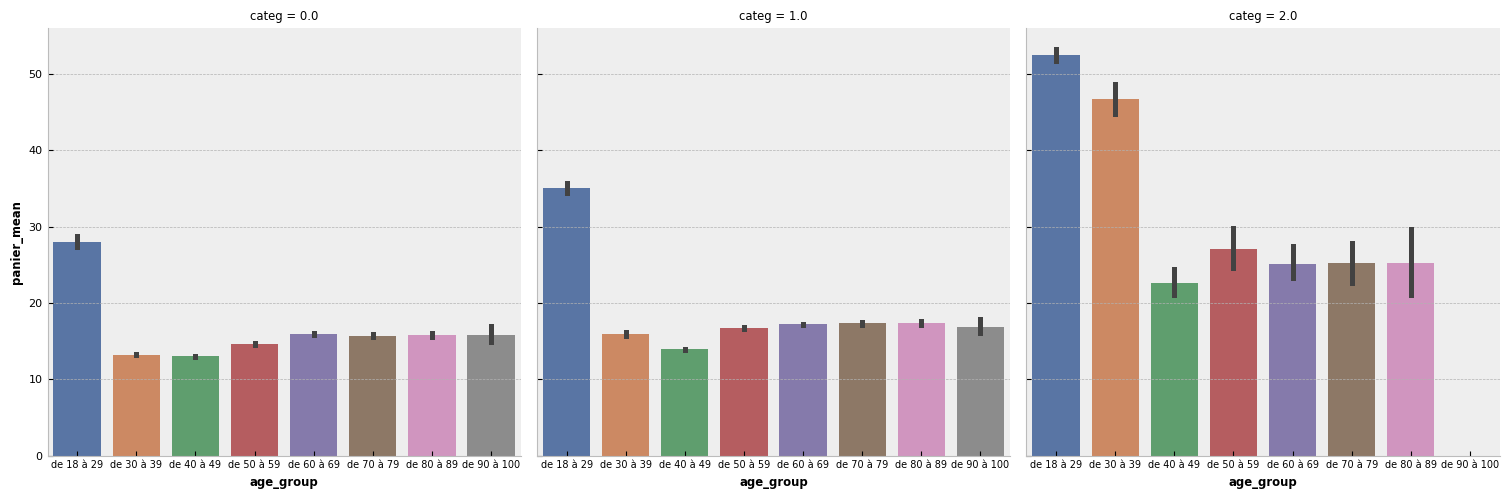

In [148]:
## la taille du panier moyen et les catégories des livres achetés.

plt.figure(figsize=(10, 3))
colors = sns.color_palette("deep", 8)

sorted_df = ctp_df.sort_values("age_group", ascending=True)

c = sns.catplot(data=sorted_df, x = "age_group", y = "panier_mean",
             kind= "bar", col = "categ", col_wrap = 4, palette=colors)
c.set_xticklabels(fontsize=7)
plt.show()

In [149]:
ctp_df.groupby(['categ']).agg({'id_prod':'count', 'price':'sum'})

id_prod      price
categ                    
0.0      47658  505649.83
1.0      26207  535155.89
2.0       4042  308361.46

### Corrélations

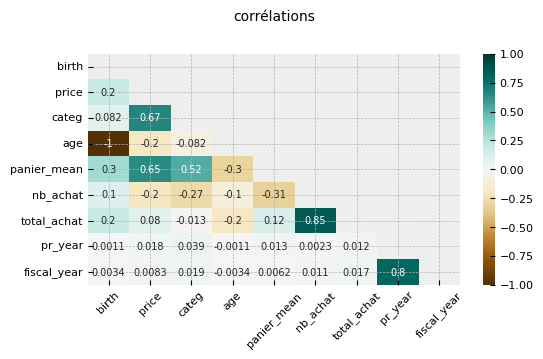

In [150]:
plt.figure(figsize=(6, 3))

heatmap = sns.heatmap(ctp_df.corr(), mask=np.triu(np.ones_like(ctp_df.corr(),
                     dtype=bool)), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('corrélations', fontdict={'fontsize':10}, pad=24)
plt.xticks(rotation=45);

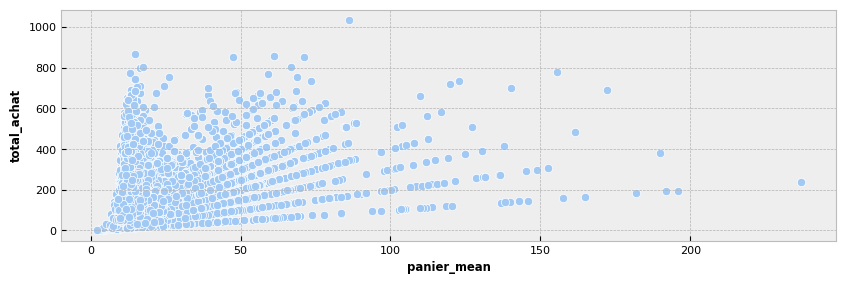

In [151]:
plt.figure(figsize=(10, 3))

sns.scatterplot(x='panier_mean', y = 'total_achat', data = ctp_df);

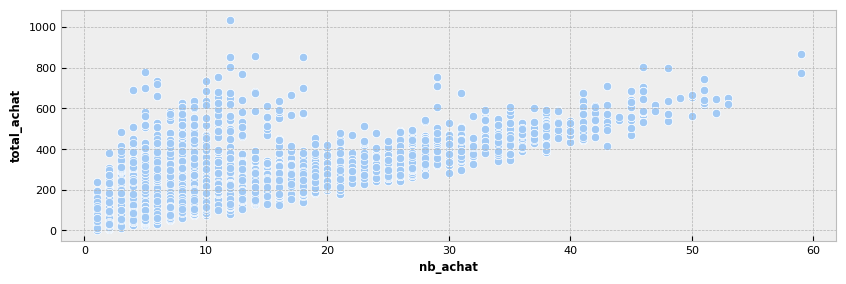

In [152]:
plt.figure(figsize=(10, 3))

sns.scatterplot(x='nb_achat', y = 'total_achat', data = ctp_df);

# Chiffre d'affaires :  Période 01/04/2022 - 28/02/2023 ( 11 mois )

* La création de la boutique en ligne en 2020, ainsi que de la situation sanitaire exceptionnelle qui a suivi. Nous avons également constaté une diminution du chiffre d'affaires en octobre 2021 en raison d'un manque de stock dans la catégorie 1. Par conséquent, notre analyse se focalisera sur une période de 11 mois, allant du 1er avril 2022 au 28 février 2023, dans le but de mieux comprendre les comportements et les profils des clients.

In [153]:
df=ctp_df.query("time >= '2022-04-01' and time <='2023-02-28'")
df.sort_values(by='time').head()

client_id sex   birth id_prod                       date session_id  \
61866    c_5085   f  2000.0   2_164 2022-04-01 02:45:13.781548   s_187549   
49701    c_2882   f  1997.0  0_1627 2022-04-01 09:21:37.898887   s_187671   
29484    c_2136   f  1990.0   1_445 2022-04-01 10:14:10.672612   s_187687   
44932    c_7907   f  1975.0  0_1386 2022-04-01 20:05:04.275438   s_187853   
62179    c_4135   f  1986.0  0_1684 2022-04-01 08:22:50.095825   s_187653   

            time  price  categ   age   age_group  panier_mean  nb_achat  \
61866 2022-04-01  52.26    2.0  23.0  de 18 à 29        33.90         6   
49701 2022-04-01   3.99    0.0  26.0  de 18 à 29        40.51         4   
29484 2022-04-01  23.99    1.0  33.0  de 30 à 39        14.99         7   
44932 2022-04-01  13.16    0.0  48.0  de 40 à 49        13.57        18   
62179 2022-04-01  17.81    0.0  37.0  de 30 à 39        11.05        15   

       total_achat    pr_month  pr_year  fiscal_year  
61866       203.43  2022-04-01     2022         2022  
49701       162.05  2022-04-01     2022         2022  
29484       104.90  2022-04-01     2022         2022  
44932       244.27  2022-04-01     2022         2022  
62179       165.79  2022-04-01     2022         2022

In [154]:
df_ca_jour = df.groupby('time').sum()['price']
df_ca_jour_total = df_ca_jour.reset_index()
df_ca_jour_total.head()

time    price
0 2022-04-01  2125.89
1 2022-04-02  2133.05
2 2022-04-03  1761.49
3 2022-04-04  1888.84
4 2022-04-05  1929.80

### CA par jour et les moyennes mobiles

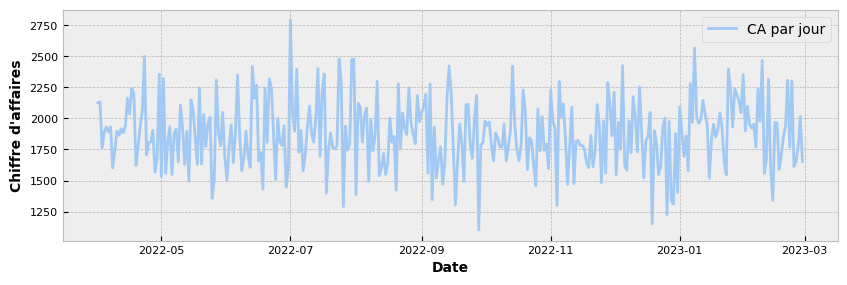

In [155]:
plt.figure(figsize = (10,3))
sns.set_palette('pastel')
ca = sns.lineplot( x= 'time', y = 'price',data= df_ca_jour_total,label='CA par jour')
ca.set_xlabel('Date', size = 10)
ca.set_ylabel("Chiffre d'affaires", size = 10);

In [156]:
df_ca_jour =  df.groupby('time').sum()['price']
df_ca_journalier = df_ca_jour.reset_index()
df_ca_journalier.set_index('time', inplace=True)
df_ca_journalier['Moyenne mobile sur 15 jours'] = df_ca_journalier['price'].rolling(15).mean()
df_ca_journalier.head(5)

price  Moyenne mobile sur 15 jours
time                                            
2022-04-01  2125.89                          NaN
2022-04-02  2133.05                          NaN
2022-04-03  1761.49                          NaN
2022-04-04  1888.84                          NaN
2022-04-05  1929.80                          NaN

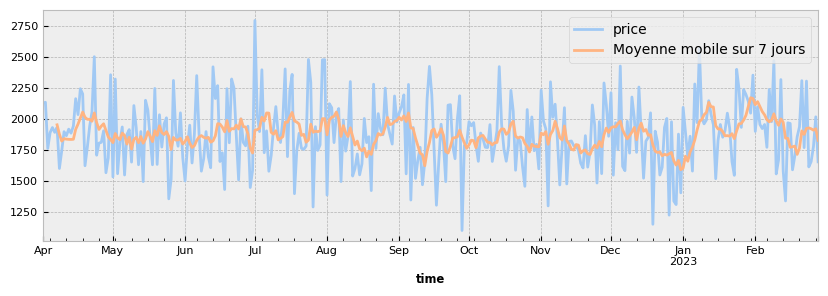

In [157]:
df_ca_journalier['Moyenne mobile sur 7 jours'] = df_ca_journalier['price'].rolling(7).mean()
var = ['price', 'Moyenne mobile sur 7 jours']
df_ca_journalier[var].plot(figsize=(10, 3));

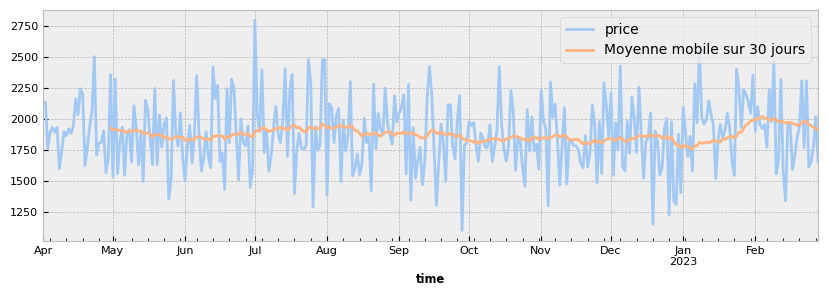

In [158]:
df_ca_journalier['Moyenne mobile sur 30 jours'] = df_ca_journalier['price'].rolling(30).mean()
var = ['price', 'Moyenne mobile sur 30 jours']
df_ca_journalier[var].plot(figsize=(10, 3));

### Ratios de catégorie et d'âge

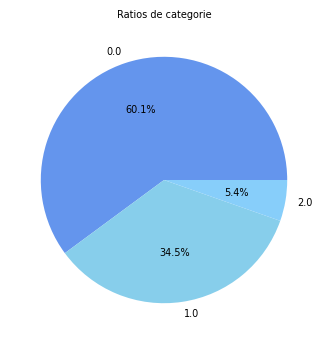

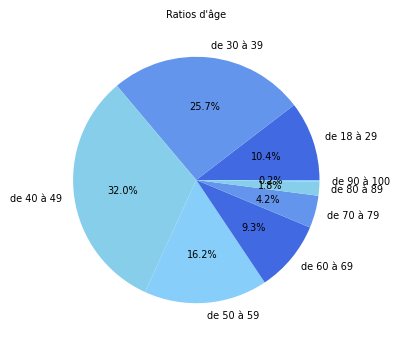

In [159]:
plt.figure(figsize=(4, 4))

total = df['categ'].nunique()
counts = df.groupby('categ').size()
ratios = counts / total
plt.pie(ratios, labels = ratios.index, autopct='%1.1f%%',
        colors=['cornflowerblue','skyblue', 'lightskyblue'],
        textprops={'fontsize': 7})
plt.title("Ratios de categorie",fontsize= 7)

plt.figure(figsize=(4, 4))

total_age = df['age_group'].nunique()
counts_age = df.groupby('age_group').size()
ratios = counts_age / total_age
plt.pie(ratios, labels = ratios.index, autopct='%1.1f%%',textprops={'fontsize': 7},
        colors=['royalblue', 'cornflowerblue','skyblue', 'lightskyblue'])
plt.title("Ratios d'âge",fontsize= 7);

### CA par les tranches d'âge et  par les genres

In [160]:
df_age_group_ca = df.groupby(['age_group','sex']).sum()['price'].reset_index()
df_age_group_ca.head()

age_group sex     price
0  de 18 à 29   f  79845.27
1  de 18 à 29   m  71319.94
2  de 30 à 39   f  66988.43
3  de 30 à 39   m  69895.59
4  de 40 à 49   f  81842.56

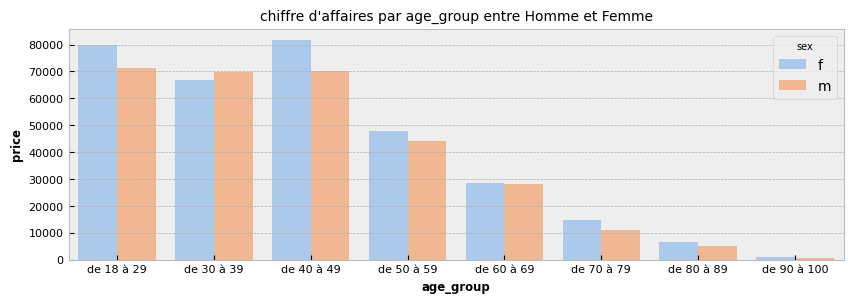

In [161]:
fig, ax = plt.subplots(figsize=(10, 3))

sns.barplot(data=df_age_group_ca, x="age_group", y="price", hue="sex", ax=ax)
plt.title("chiffre d'affaires par age_group entre Homme et Femme", fontsize=10);

### CA / le panier moye et les tranches d'âge

Existe-t-il une corrélation significative entre les tranches d'âge et le chiffre d'affaires

* H0 : Il n'existe pas de relation significative entre les tranches d'âge des clients et le chiffre d'affaires.

* H1 : Il existe une relation significative entre les tranches d'âge des clients et le chiffre d'affaires.

In [162]:
from scipy.stats import f_oneway, levene, ttest_ind

group1 = df[df['age_group'] == 'de 18 à 29']['price']
group2 = df[df['age_group'] == 'de 30 à 39']['price']
group3 = df[df['age_group'] == 'de 40 à 49']['price']
group4 = df[df['age_group'] == 'de 50 à 59']['price']
group5 = df[df['age_group'] == 'de 60 à 69']['price']
group6 = df[df['age_group'] == 'de 70 à 79']['price']
group7 = df[df['age_group'] == 'de 80 à 89']['price']
group8 = df[df['age_group'] == 'de 90 à 100']['price']

f_stat, p_value = stats.f_oneway(group1, group2, group3,group4,group5,group6,group7,group8)

print("Statistique F :", f_stat)
print("Valeur p :", p_value)


Statistique F : 1214.6797757329318
Valeur p : 0.0


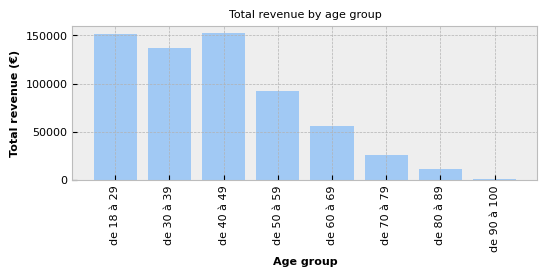

In [163]:
plt.figure(figsize=(6, 2))

df_age_ca = pd.pivot_table(data=df, index='age_group', values='price', aggfunc='sum')
plt.bar(df_age_ca.index, df_age_ca['price'])
plt.title('Total revenue by age group',fontsize=8)

plt.ylabel("Total revenue (€)",fontsize=8)
plt.xlabel('Age group',fontsize=8)
plt.xticks(rotation = 90,fontsize=8)
plt.yticks(fontsize=8);

In [164]:
from scipy.stats import f_oneway, levene, ttest_ind

group1 = df[df['age_group'] == 'de 18 à 29']['total_achat']
group2 = df[df['age_group'] == 'de 30 à 39']['total_achat']
group3 = df[df['age_group'] == 'de 40 à 49']['total_achat']
group4 = df[df['age_group'] == 'de 50 à 59']['total_achat']
group5 = df[df['age_group'] == 'de 60 à 69']['total_achat']
group6 = df[df['age_group'] == 'de 70 à 79']['total_achat']
group7 = df[df['age_group'] == 'de 80 à 89']['total_achat']
group8 = df[df['age_group'] == 'de 90 à 100']['total_achat']

f_stat, p_value = stats.f_oneway(group1, group2, group3,group4,group5,group6,group7,group8)

print("Statistique F :", f_stat)
print("Valeur p :", p_value)

Statistique F : 391.83150328679596
Valeur p : 0.0


Le panier moyen dépend des tranches d'âge

* H0 : La taille du panier moyen ne dépend pas de l'âge des clients.
* H1 : Les deux variables sont dépendantes.

In [165]:
df_age_total_sales = df.groupby('age_group').sum().reset_index()
df_age_total_sales = df_age_total_sales[['age_group', 'panier_mean']]
df_age_total_sales.head()

age_group  panier_mean
0  de 18 à 29    150907.91
1  de 30 à 39    136312.87
2  de 40 à 49    151851.11
3  de 50 à 59     91252.18
4  de 60 à 69     55940.12

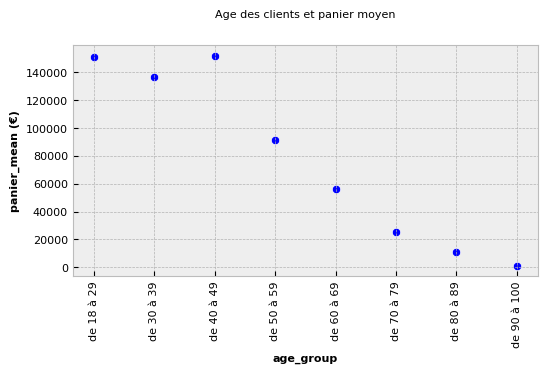

In [166]:
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df_age_total_sales, x="age_group", y="panier_mean", color='blue')
plt.title("Age des clients et panier moyen", pad=20, fontsize = 8)
plt.ylabel("panier_mean (€)",fontsize=8)
plt.xlabel('age_group',fontsize=8)
plt.xticks(rotation = 90,fontsize=8)
plt.yticks(fontsize=8);

In [167]:
group1 = df[df['age_group'] == 'de 18 à 29']['panier_mean']
group2 = df[df['age_group'] == 'de 30 à 39']['panier_mean']
group3 = df[df['age_group'] == 'de 40 à 49']['panier_mean']
group4 = df[df['age_group'] == 'de 50 à 59']['panier_mean']
group5 = df[df['age_group'] == 'de 60 à 69']['panier_mean']
group6 = df[df['age_group'] == 'de 70 à 79']['panier_mean']
group7 = df[df['age_group'] == 'de 80 à 89']['panier_mean']
group8 = df[df['age_group'] == 'de 90 à 100']['panier_mean']

f_stat, p_value = stats.f_oneway(group1, group2, group3,group4,group5,group6,group7,group8)

print("Statistique F :", f_stat)
print("Valeur p :", p_value)

Statistique F : 4216.030477922714
Valeur p : 0.0


### CA et volume des ventes par genre

In [168]:
df_by_sex = df.groupby(['sex']).agg(total_sales=('id_prod', 'count'), total_ca=('price', 'sum')).reset_index()

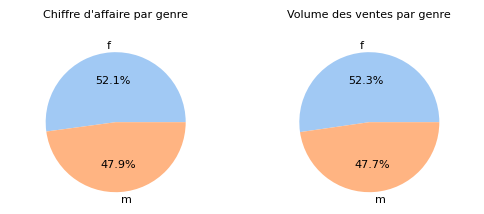

In [169]:
plt.figure(figsize=(6,2))

plt.subplot(1,2,1)
plt.pie(df_by_sex.total_ca, autopct='%1.1f%%', labels=['f', 'm'],textprops={'fontsize': 8})
plt.axis('equal')
plt.title("Chiffre d'affaire par genre", pad=20,fontsize=8)
plt.plot()

plt.subplot(1,2,2)
plt.pie(df_by_sex.total_sales, autopct='%1.1f%%', labels=['f', 'm'],textprops={'fontsize': 8})
plt.axis('equal')
plt.title("Volume des ventes par genre", pad=20, fontsize=8)
plt.plot();

### Top 10 des produits les plus vendus dans la catégorie

In [170]:
ca_book = df.pivot_table(index=['id_prod', 'categ'],
                         aggfunc={'price': np.sum}).sort_values(by='price', ascending=False).reset_index()
ca_book.head(5)

id_prod  categ    price
0   2_159    2.0  4963.66
1   2_135    2.0  4346.37
2   2_209    2.0  3919.44
3   2_112    2.0  3716.35
4   1_369    1.0  3334.61

In [171]:
ca_book_categ = df.pivot_table(index=['id_prod', 'categ'],
                         values=['price'],
                         aggfunc='sum').sort_values(by='price', ascending=False).reset_index()

ca_book_categ.head(5)

id_prod  categ    price
0   2_159    2.0  4963.66
1   2_135    2.0  4346.37
2   2_209    2.0  3919.44
3   2_112    2.0  3716.35
4   1_369    1.0  3334.61

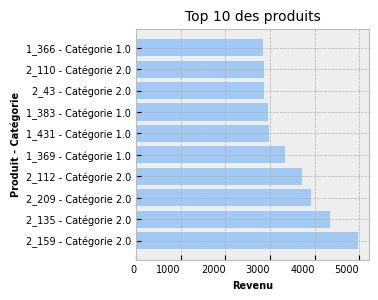

In [172]:
top_10 = ca_book_categ.head(10)
plt.barh(top_10['id_prod'].astype(str) + ' - Catégorie ' + top_10['categ'].astype(str), top_10['price'])
plt.xlabel('Revenu',fontsize=7)
plt.ylabel('Produit - Catégorie',fontsize=7)
plt.title('Top 10 des produits',fontsize=10)
plt.xticks(fontsize=7, horizontalalignment='right')
plt.yticks(fontsize=7);

In [173]:
ca_book_top = df.pivot_table(index=['id_prod', 'categ'],
                         aggfunc={'price': [np.sum], 'id_prod': 'count'}
                        ).sort_values(by=('price', 'sum'), ascending=False).reset_index()
ca_book_top.columns = ['id_prod', 'categ', 'nb_ventes', 'ca_total']
ca_book_top.head()

id_prod  categ  nb_ventes  ca_total
0   2_159    2.0         34   4963.66
1   2_135    2.0         63   4346.37
2   2_209    2.0         56   3919.44
3   2_112    2.0         55   3716.35
4   1_369    1.0        139   3334.61

In [174]:
ca_top20 = ca_book_top.sort_values(by=('nb_ventes'), ascending=False).head(20)
ca_top20.head(5)

id_prod  categ  nb_ventes  ca_total
4    1_369    1.0        139   3334.61
13   1_498    1.0        115   2687.55
30   1_392    1.0        111   2010.21
34   1_413    1.0        109   1960.91
5    1_431    1.0        106   2966.94

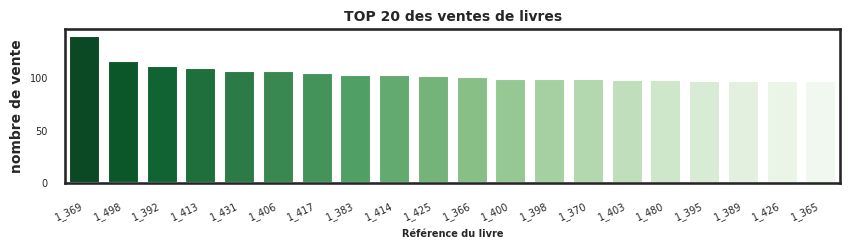

In [175]:
sns.set_theme(style="white", context="talk")
fig, ax = plt.subplots(figsize = (10,2))

ax = sns.barplot(x=ca_top20['id_prod'], y=ca_top20["nb_ventes"], palette='Greens_r')

plt.title("TOP 20 des ventes de livres", fontsize=10, fontweight='bold')
plt.xlabel("Référence du livre", fontsize=7, fontweight='bold')
plt.ylabel("nombre de vente", fontsize=10, fontweight='bold')
plt.xticks(rotation=25, fontsize=7, horizontalalignment='right')
plt.yticks(fontsize=7);

### Répartition par catégorie

In [176]:
df_by_categ = df.groupby(['categ']).agg(total_sales=('id_prod', 'count'), total_ca=('price', 'sum')).reset_index()
df_by_categ

categ  total_sales   total_ca
0    0.0        21540  228416.61
1    1.0        12364  252375.99
2    2.0         1927  145991.40

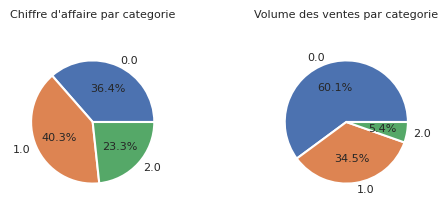

In [177]:
plt.figure(figsize=(6,2))

categories = df['categ'].unique()

labels = [str(category) for category in categories]
plt.subplot(1,2,1)
plt.pie(df_by_categ.total_ca, autopct='%1.1f%%', labels=labels, textprops={'fontsize': 8})
plt.title("Chiffre d'affaire par categorie", pad=20, fontsize=8)

plt.subplot(1,2,2)
plt.pie(df_by_categ.total_sales, autopct='%1.1f%%', labels=labels, textprops={'fontsize': 8})
plt.title("Volume des ventes par categorie", pad=20, fontsize=8);

### Corrélations

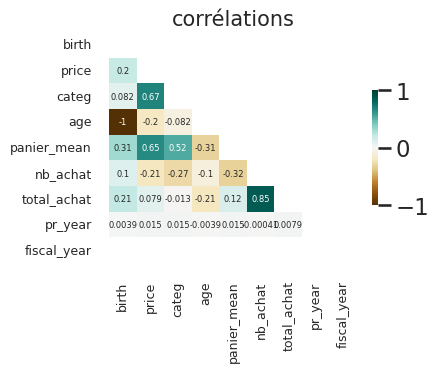

In [178]:
plt.figure(figsize=(4, 3))

heatmap = sns.heatmap(df.corr(), mask=np.triu(np.ones_like(df.corr(), dtype=bool)),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG',annot_kws={'fontsize': 6},cbar_kws={"shrink": .5})
heatmap.set_title('corrélations', fontdict={'fontsize':15}, pad=5)
plt.xticks(fontsize= 9)
plt.yticks(fontsize= 9);

### Courbe de Lorenz

In [179]:
df_by_product = df.groupby(['id_prod']).agg(total_sales=('id_prod', 'count'),
                                                 total=('price', 'sum')).reset_index()

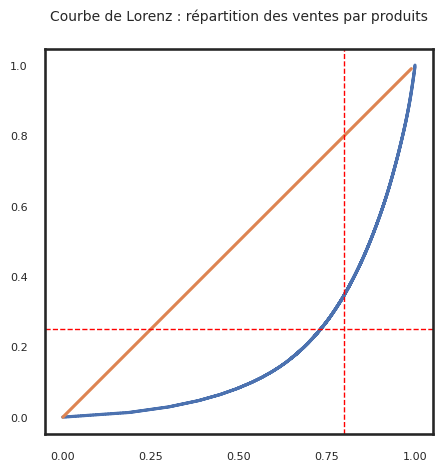

In [180]:
rev = df_by_product['total_sales'].values
n = len(rev)
lorenz = np.cumsum(np.sort(rev)) / rev.sum()
lorenz = np.append([0],lorenz)

plt.figure(figsize=(5,5))

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')

cst = np.arange(0,1,.01)
sns.lineplot(x=cst,y=cst)

plt.axvline(x=0.8, color='red', linestyle='--', linewidth=1)
plt.axhline(y=0.25, color='red', linestyle='--', linewidth=1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Courbe de Lorenz : répartition des ventes par produits", pad=20,fontsize=10);

* 80% des ventes sont réalisées sur plus de 25% des produits.

In [181]:
df_by_client = df.groupby('client_id').agg(total_sales=('time', 'count'), total=('price', 'sum')).reset_index()

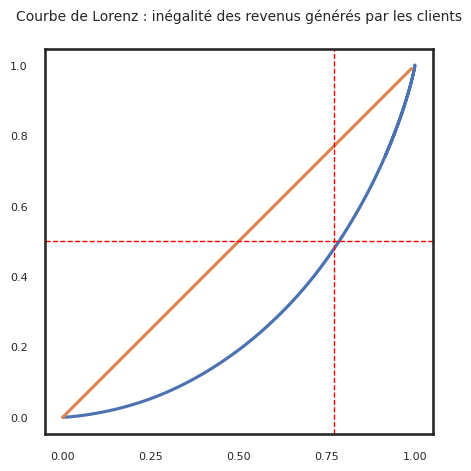

In [182]:
rev = df_by_client['total'].values
n = len(rev)
lorenz = np.cumsum(np.sort(rev)) / rev.sum()
lorenz = np.append([0],lorenz)

plt.figure(figsize=(5,5))

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')

cst = np.arange(0,1,.01)
sns.lineplot(x=cst,y=cst)

plt.axvline(x=0.77, color='red', linestyle='--', linewidth=1)
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Courbe de Lorenz : inégalité des revenus générés par les clients", pad=20,fontsize=10);

* 75% des clients génèrent 50% du chiffre d'affaire.


### CA et les catégories

Les catégories influencent-ils les CA ?

* H0 : Les catégories n'influencent pas sur les CA ?

* H1 : Les catégories influencent sur les CA ?

In [183]:
from scipy.stats import f_oneway, levene, ttest_ind

categ_ca_0 = df[df['categ'] == 0]['price']
categ_ca_1 = df[df['categ'] == 1]['price']
categ_ca_2 = df[df['categ'] == 2]['price']

f_stat, p_value = stats.f_oneway(categ_ca_0, categ_ca_1, categ_ca_2)

print("Statistique F :", f_stat)
print("Valeur p :", p_value)


Statistique F : 33155.823175866026
Valeur p : 0.0


### Chi-2 : les tranches d'âge et les catégories

Les tranches d'âge influencent-elles les catégories d'achat ?

* H0 : Il n'y a pas d'influence de la tranche d'âge sur les catégories d'achat.
* H1 : Il y a une influence de la tranche d'âge sur les catégories d'achat.

In [184]:
df_pivot_sum = pd.pivot_table(data=df, index='age_group', columns='categ', values='price', aggfunc='sum')

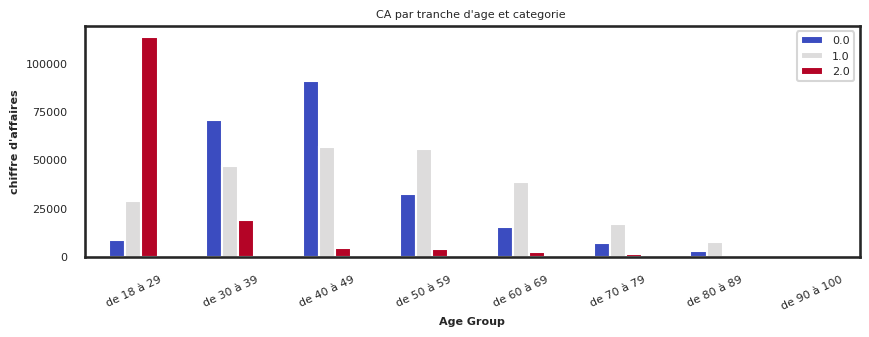

In [185]:
df_pivot_sum.plot(kind='bar', figsize=(10,3), colormap='coolwarm')
plt.title("CA par tranche d'age et categorie ",fontsize=8)

plt.xlabel('Age Group',fontsize=8)
plt.ylabel("chiffre d'affaires",fontsize=8)
plt.xticks(rotation=25,fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8);

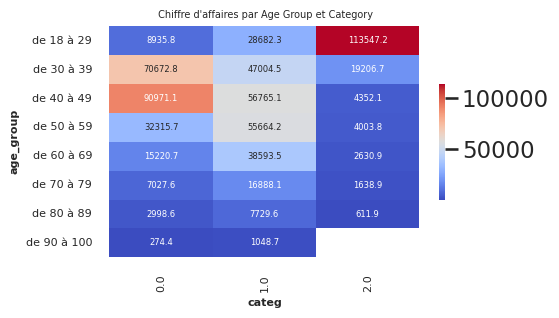

In [186]:
plt.figure(figsize=(5, 3))
sns.heatmap(df_pivot_sum, cmap='coolwarm', annot=True, fmt='.1f',annot_kws={'fontsize': 6},cbar_kws={"shrink": .5})
plt.title(" Chiffre d'affaires par Age Group et Category", fontsize = 7)
plt.ylabel("age_group",fontsize=8)
plt.xlabel('categ',fontsize=8)
plt.xticks(rotation=90,fontsize=8)
plt.yticks(fontsize=8);

In [187]:
# La création de mon tableau de contingence

X = "age_group"
Y = "categ"

cont_2 = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_2

categ            0.0      1.0     2.0  Total
age_group                                   
de 18 à 29     827.0   1386.0  1518.0   3731
de 30 à 39    6665.0   2302.0   252.0   9219
de 40 à 49    8633.0   2796.0    45.0  11474
de 50 à 59    3051.0   2714.0    44.0   5809
de 60 à 69    1409.0   1898.0    37.0   3344
de 70 à 79     652.0    848.0    21.0   1521
de 80 à 89     276.0    369.0    10.0    655
de 90 à 100     27.0     51.0     NaN     78
Total        21540.0  12364.0  1927.0  35831

In [188]:
stats.chi2_contingency(cont_2, correction = True)

Chi2ContingencyResult(statistic=nan, pvalue=nan, dof=24, expected_freq=array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]]))

* La valeur p est inférieure au niveau de signification de 0.05, il existe une relation significative entre les tranches d'âge et les catégories d'achat.

### Tranche d'âge des clients et la fréquence d’achat / Anova

Il y a une dépendance entre les tranches d'âges et les fréquences d'achat ?

* H0 : La fréquence d'achat ne dépend pas de l'âge des clients.
* H1 : Les deux variables sont dépendantes.

* Il existe donc une relation entre les tranches d'âges et les fréquences d'achat. On rejette l'hypothèse H0.



In [189]:
# fréquence d'achat mensuelle par client
def frequence(x):
    d = {}
    d["frequence"] = (x['session_id'].count()/ x['client_id'].value_counts().count())
    return pd.Series(d, index=["frequence"])

In [190]:
# période et par tranche d'âge
df_age_frequence = df.groupby(['pr_month','age_group']).apply(frequence)
df_age_frequence

frequence
pr_month   age_group             
2022-04-01 de 18 à 29    1.237226
           de 30 à 39    1.601103
           de 40 à 49    1.541411
           de 50 à 59    1.360963
           de 60 à 69    1.354067
...                           ...
2023-02-01 de 50 à 59    1.352941
           de 60 à 69    1.222222
           de 70 à 79    1.228070
           de 80 à 89    1.243902
           de 90 à 100   1.285714

[88 rows x 1 columns]

In [191]:
df_age_frequence = df_age_frequence.reset_index()

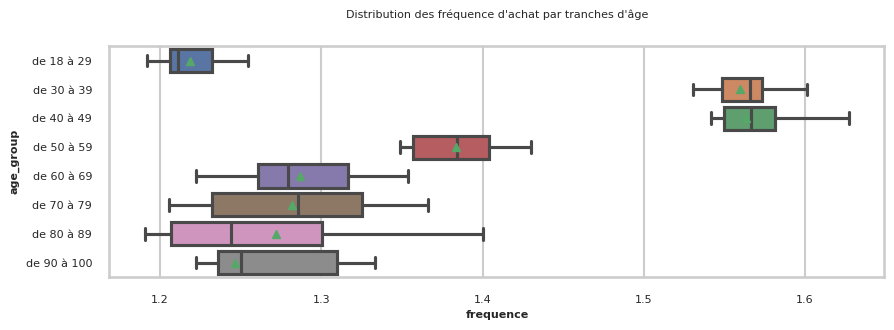

In [192]:
plt.figure(figsize=(10,3))
sns.set_style("whitegrid")

sns.boxplot(data=df_age_frequence, x='frequence', y='age_group', orient='h', showfliers=False, showmeans=True)
plt.title("Distribution des fréquence d'achat par tranches d'âge", pad=20,fontsize=8)
plt.ylabel("age_group",fontsize=8)
plt.xlabel('frequence',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8);

In [193]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [194]:
lm = ols('frequence ~ age_group', data = df_age_frequence).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)

In [195]:
table

df    sum_sq   mean_sq         F        PR(>F)
age_group   7.0  1.467660  0.209666  46.02881  1.744081e-25
Residual   80.0  0.364408  0.004555       NaN           NaN

In [196]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              frequence   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     46.03
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.74e-25
Time:                        10:38:42   Log-Likelihood:                 116.55
No. Observations:                  88   AIC:                            -217.1
Df Residuals:                      80   BIC:                            -197.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.2187      0.020     59.889      0.000       1.178       1.259
age_group[T.de 30 à 39]      0.3411      0.029     11.852      0.000       0.284       0.398
age_group[T.de 40 à 49]      0.3449      0.029     11.983      0.000       0.288       0.402
age_group[T.de 50 à 59]      0.1651      0.029      5.736      0.000       0.108       0.222
age_group[T.de 60 à 69]      0.0682      0.029      2.371      0.020       0.011       0.126
age_group[T.de 70 à 79]      0.0633      0.029      2.201      0.031       0.006       0.121
age_group[T.de 80 à 89]      0.0531      0.029      1.844      0.069      -0.004       0.110
age_group[T.de 90 à 100]     0.0277      0.029      0.962      0.339      -0.030       0.085
==============================================================================
Omnibus:                       20.549   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.127
Skew:                          -0.227   Prob(JB):                     2.48e-28
Kurtosis:                       8.871   Cond. No.                         8.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Genre et categorie

Les genres influencent-ils les catégories d'achats ?

* H0 : Les genres n'influencent pas les catégories d'achats
* H1 : Les genres influencent les catégories d'achats

* L'hypothèse nulle est rejetée, il y a une corrélation entre le genre et la categorie des achats.

In [197]:
genre_categca = df.pivot_table(index='sex', columns='categ', values='price', aggfunc='sum',
                               margins = True,margins_name="Total")
genre_categca

categ        0.0        1.0        2.0      Total
sex                                              
f      119514.84  132156.64   75102.41  326773.89
m      108901.77  120219.35   70888.99  300010.11
Total  228416.61  252375.99  145991.40  626784.00

In [198]:
from scipy.stats import chi2_contingency


chi2_contingency(genre_categca)

Chi2ContingencyResult(statistic=36.60270117904808, pvalue=2.1044277894921283e-06, dof=6, expected_freq=array([[119085.0184279 , 131576.24316336,  76112.62840874,
        326773.89      ],
       [109331.5915721 , 120799.74683664,  69878.77159126,
        300010.11      ],
       [228416.61      , 252375.99      , 145991.4       ,
        626784.        ]]))

<Figure size 600x700 with 0 Axes>

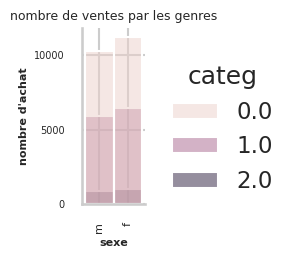

In [199]:
plt.figure(figsize=(6,7))

sns.displot(data=df, x='sex', hue='categ', height=3, aspect=0.8)
plt.ylabel( "nombre d'achat",fontsize=8)
plt.xlabel('sexe',fontsize=8)
plt.xticks(rotation = 90 , fontsize=8)
plt.yticks(fontsize=7)
plt.title("nombre de ventes par les genres",fontsize= 9);

In [200]:
chi2_contingency(genre_categca)

Chi2ContingencyResult(statistic=36.60270117904808, pvalue=2.1044277894921283e-06, dof=6, expected_freq=array([[119085.0184279 , 131576.24316336,  76112.62840874,
        326773.89      ],
       [109331.5915721 , 120799.74683664,  69878.77159126,
        300010.11      ],
       [228416.61      , 252375.99      , 145991.4       ,
        626784.        ]]))

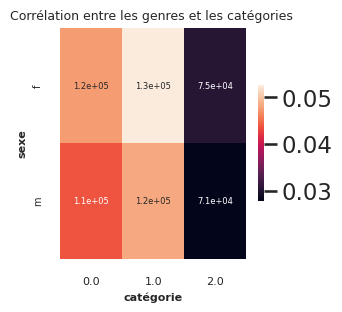

In [201]:
tx = genre_categca.loc[:,["Total"]]
ty = genre_categca.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

c = genre_categca.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1], annot = c.iloc[:-1,:-1], annot_kws={'fontsize': 6},
            cbar_kws={"shrink": .5})
plt.ylabel("sexe",fontsize=8)
plt.xlabel('catégorie',fontsize=8)
plt.xticks(rotation = 0 ,fontsize=8)
plt.yticks(fontsize=7)
plt.title("Corrélation entre les genres et les catégories ",fontsize= 9);


### Test correlation - Spearman

Y a-t-il une corrélation significative entre le nombre d'achats et le montant total des achats

* Ho : Il n'y a pas de corrélation significative entre le nombre d'achats et le montant total des achats.

* Ha : Il y a une corrélation significative entre le nombre d'achats et le montant total des achats.

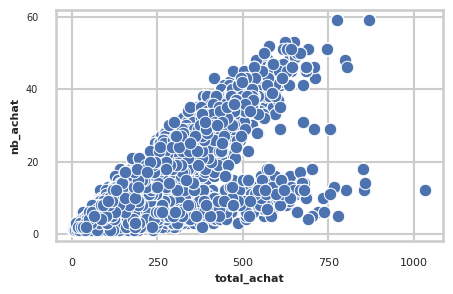

In [202]:
plt.figure(figsize=(5, 3))

sns.scatterplot(x='total_achat', y = 'nb_achat', data = df)
plt.ylabel("nb_achat",fontsize=8)
plt.xlabel('total_achat',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=7);

In [203]:
nb = df['nb_achat']
ta = df['total_achat']

In [204]:
coef, p = spearmanr(nb, ta)
print('Coefficient de corrélation de Spearman : %.3f' % coef)
alpha = 0.05
if p > alpha:
    print('Les échantillons ne sont pas corrélés (échec de rejet de H0) p=%.3f' % p)
else:
    print('Les échantillons sont corrélés (rejet de H0) p=%.3f' % p)

Coefficient de corrélation de Spearman : 0.848
Les échantillons sont corrélés (rejet de H0) p=0.000


### Taille du panier moyen et les catégories des livres achetés

Le lien entre la taille du panier moyen et les catégories des livres achetés

* Ho : Il n'y a pas de lien entre le panier moyen et les catégories.
* Ha :  Il y a un lien entre le panier moyen et les catégories.

In [205]:
from scipy.stats import f_oneway, levene, ttest_ind

group1 = df[df['categ'] == 0.0]['panier_mean']
group2 = df[df['categ'] == 1.0]['panier_mean']
group3 = df[df['categ'] == 2.0]['panier_mean']
f_stat, p_value = stats.f_oneway(group1, group2, group3)

print("Statistique F :", f_stat)
print("Valeur p :", p_value)

Statistique F : 14371.16570730752
Valeur p : 0.0


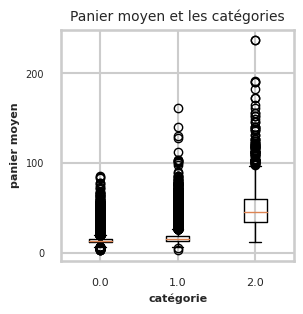

In [206]:
fig, ax = plt.subplots()
ax.boxplot([group1, group2, group3], labels=['0.0', '1.0', '2.0'])
ax.set_xlabel('Groupes')
ax.set_ylabel('Valeur de panier moyen')
ax.set_title('Panier moyen et les catégories',fontsize=10)
plt.ylabel("panier moyen",fontsize=8)
plt.xlabel('catégorie',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=7);

Y a-t-il une corrélation significative entre l'âge et le panie moyen

* Ho : Il n'y a pas de lien entre le panier moyen et l'âge.
* Ha : Il y a un lien entre le panier moyen et l'âge.

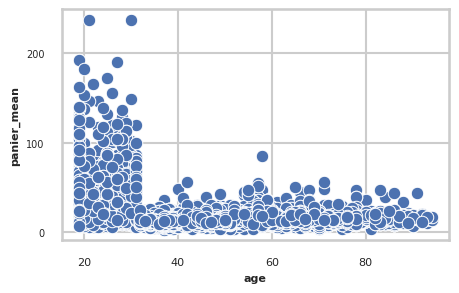

In [207]:
plt.figure(figsize=(5, 3))

sns.scatterplot(x='age', y = 'panier_mean', data = df)
plt.ylabel("panier_mean",fontsize=8)
plt.xlabel('age',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=7);

In [208]:
a = df['panier_mean']
b = df['age']

coef, p = spearmanr(a, b)
print('Coefficient de corrélation de Spearman : %.3f' % coef)
alpha = 0.05
if p > alpha:
    print('Les échantillons ne sont pas corrélés (échec de rejet de H0) p=%.3f' % p)
else:
    print('Les échantillons sont corrélés (rejet de H0) p=%.3f' % p)

Coefficient de corrélation de Spearman : 0.002
Les échantillons ne sont pas corrélés (échec de rejet de H0) p=0.741
